
# Описание проекта

Интернет-магазин **"Стримчик"**.

Данные:
* продажи игр;
* оценки пользователей и экспертов;
* жанр игр;
* платформа, для которой разработана (адаптирована) игра (например, Xbox или PlayStation)
* Период: **1980 - 2016 гг.**.

**Цель проекта:** определить потенциально наиболее популярный продук для планирования рекламной кампании.

**Основная задача проекта:** выявить закономерности, определяющие успешность игры.

***Примечания:***
* В наборе данных попадается аббревиатура *ESRB (Entertainment Software Rating Board)* — это ассоциация, **определяющая возрастной рейтинг** компьютерных игр. *ESRB* оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».



## Шаг 1. Выгрузка данных и общая информация

In [357]:
import pandas as pd # импорт библиотеки pandas

# импорт библиотеки, стандартно используется имя plt
import matplotlib.pyplot as plt
import numpy as np  # импорт библиотеки, стандартно используется имя np
import seaborn as sns
from scipy import stats as st
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')

In [358]:
try:
    data_original = pd.read_csv('games.csv')
    display(data_original.head())
except:
    data_original = pd.read_csv('/datasets/games.csv')
    display(data_original.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


С выгрузкой данных проблем не возникло.

In [359]:
# Сохраняем исходный файл в переменную, скоторой будем работать.
# При этом полезно сохранять исходный файл, чтобы к нему был всегда доступ.
data = data_original
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [360]:
# Сумма пропусков в каждом столбце
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

***ОБЩАЯ ХАРАКТЕРИСТИКА ДАННЫХ***

Всего: 
* **16 715** наблюдений.
* **11** столбцов (характеристик).

1) Столбец `Name` — название игры.
* **Пропуски** (*2 наблюдения*). Число пропусков незначительно, и вероятно, что переменная названия пригодится лишь для определения самых успешных игр с точки зрения продаж. Вряд ли пропуски именно в названиях успешных игр.
* **Некорректное название столбца**. Привести название к нижнему регистру.
* Возможно **наличие неявных дубликатов**. Привести данные столбца к нижнему регистру и дполнительно изучать.

2) Столбец `Platform` — платформа, для которой разработана (адаптирована) игра.
* **Некорректное название столбца**. Привести название к нижнему регистру.
* Возможно **наличие неявных дубликатов**. Привести данные столбца к нижнему регистру и дполнительно изучать.

3) Столбец `Year_of_Release` — год выпуска.
* **Пропуски** в данных требуют дополнительного изучения *(269 пропусков)*.
* **Некорректное название столбца**. Привести название к нижнему регистру.
* **Неверный тип данных**. Стоит заменить на целочисленный.

4) Столбец `Genre` — жанр игры.
* **Пропуски** (*2 наблюдения*). Число пропусков незначительно, и вероятно, что переменная названия пригодится лишь для определения жанров самых успешных игр с точки зрения продаж. Вряд ли пропуски именно в названиях успешных игр. Возможно, это те же наблюдения, в которых пропущено название игры.
* **Некорректное название столбца**. Привести название к нижнему регистру.
* Возможно **наличие неявных дубликатов**. Привести данные столбца к нижнему регистру и дполнительно изучать. 

5) Столбец `NA_sales` — продажи в Северной Америке (миллионы проданных копий).
* **Некорректное название столбца**. Привести название к нижнему регистру. 

6) Столбец `EU_sales` — продажи в Европе (миллионы проданных копий).
* **Некорректное название столбца**. Привести название к нижнему регистру.

7) Столбец `JP_sales` — продажи в Японии (миллионы проданных копий).
* **Некорректное название столбца**. Привести название к нижнему регистру.

8) Столбец `Other_sales` — продажи в других странах (миллионы проданных копий).
* **Некорректное название столбца**. Привести название к нижнему регистру. 

9) Столбец `Critic_Score` — оценка критиков *(максимум 100)*.
* **Пропуски** в данных требуют дополнительного изучения *(8 578 пропусков)*.
* **Некорректное название столбца**. Привести название к нижнему регистру.

10) Столбец `User_Score` — оценка пользователей *(максимум 10)*.
* **Пропуски** в данных требуют дополнительного изучения *(6 701 пропусков)*.
* **Некорректное название столбца**. Привести название к нижнему регистру.
* **Неверный тип данных**. Необходимо заменить на численный.

11) Столбец `Rating` — рейтинг от организации **ESRB (англ. Entertainment Software Rating Board)**. Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
* **Пропуски** в данных требуют дополнительного изучения *(6 766 пропусков)*.
* **Некорректное название столбца**. Привести название к нижнему регистру.
___________________________________________________________________________
**КРАТКИЙ ВЫВОД** 

Выявлены следующие облемы в данных: 
* **Некорректное название столбца** (общая для всех столбцов).
* Возможное **наличие неявных дубликатов** (в столбцах с текстовыми данными).
* **Неверны тип данных** (для столбцов год выпуска и оценка пользователей).
* **Наличие пропусков**.

## Шаг 2. Подготовка данных к анализу.

### 2.1 Решение проблемы c названием столбцов

In [361]:
# Замена названия столбцов (переводим названия в нижний регистр)
data.columns = data.columns.str.lower()

# проверка
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2 Возможное наличие неявных дубликатов (в столбцах с текстовыми данными).

In [362]:
# Проверка на наличие явных дубликатов
if data.duplicated().sum() > 0:
    data = data.drop_duplicates()
    print(f'Обнаружено и удалено {data.duplicated().sum()} штук явных дубликатов в наблюдениях.')
else:
    print('Явные дубликаты не обнаружены.')

Явные дубликаты не обнаружены.


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что проверены дубликаты, некоторые студенты забывают это сделать. 😊</font>

In [363]:
# Определим столбцы содержащие текстовую информацию
object_type_columns = []
for col_name in data.columns:
    if str(np.dtype(data[col_name])) == 'object':
        object_type_columns.append(col_name)

object_type_columns

['name', 'platform', 'genre', 'user_score', 'rating']

Среди столбцов, содержищих текстовую информацию, оказался `user_score`. Видимо, помимо числовых данных в этом столбце есть какая-то отдельная категория игр без оценок.

Рассмотрим уникальные значения и их частоту.

In [364]:
for col_name in object_type_columns:
    devider = '_'
    print(devider*len(max(object_type_columns)))
    print(col_name)
    print(devider*len(max(object_type_columns)))
    print(data[col_name].value_counts().sort_index())
    print(devider*100)

__________
name
__________
 Beyblade Burst                 1
 Fire Emblem Fates              1
 Frozen: Olaf's Quest           2
 Haikyu!! Cross Team Match!     1
 Tales of Xillia 2              1
                               ..
thinkSMART: Chess for Kids      1
uDraw Studio                    1
uDraw Studio: Instant Artist    2
wwe Smackdown vs. Raw 2006      1
¡Shin Chan Flipa en colores!    1
Name: name, Length: 11559, dtype: int64
____________________________________________________________________________________________________
__________
platform
__________
2600     133
3DO        3
3DS      520
DC        52
DS      2151
GB        98
GBA      822
GC       556
GEN       29
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      392
PSP     1209
PSV      430
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: platform, dtype: i

#### **Промежуточный вывод**
* Столбец **`name`**:
    - некоторые названия игр начинаются с пробела;
    - возможно наличие неявных дубликатов (проверим путем приведения строк к нижнему регистру и удалением пробелов). Однако нужно учитывать, что одна и та же игра может быть выпущена на разных платформах.


* Столбец **`platform`**:
    - неявных дубликатов не обнаружено;
    - есть значение **2600**, которое вероятно относится к платформе *Atari 2600* (для удобства можно заменить).
    

* Столбец **`genre`**:
    - неявных дубликатов не обнаружено.
    

* Столбец **`user_score`**:
    - Неопознананое значение `tbd`. Проведем дополнительное изучение.
    

* Столбец **`rating`**:
    - неявных дубликатов не обнаружено.

#### 2.2.1 Столбец **`name`**

In [365]:
# Удаляем пробелы в начале и в конце названий игр с помощью функции 'strip()'
data['name'] = data['name'].str.strip()

Для определения неявных дубликатов в столбце **`name`** необходимо учесть, что одна и та же игра может выпускаться на разных платформах. С этой целью следует создать вспомогательный столбец, который будет представлять собой название игры и платформы (т. е. 'слепить' вместе). В этом случае одна и та же игра выпущенная на разных платформах не будет считаться дубликатом (поскольку неявных дубликатов в столбце `platform` не было выявлено). После создания этого столбца следует привести его к нижнему регистру и удалить все пробелы (возможно при заполнении названия одной и той же игры на разных платформах могли сделать опечатки, например, поставить лишние пробелы и/или лишние символы в верхнем регистре.

In [366]:
# Работа со столбцом 'name'
# Найдем неявные дубликаты названий игр с учетом того, 
# что одна и та же игра может быть выпущена на нескольких платформах.

def implicit_name_duplicates(data):
    # Создаем булевый список для определения того, в какой строке по счет стоит неявный дубликат
    name_dups = ((data['name']+data['platform']) # Создаем столбцец путем сложения названий игр и платформ
                .str.lower() # приводим этот столбец к нижнему регистру
                .str.replace(' ','') # удаляем все пробелы
                .duplicated(keep=False)) # создаем булевый массив дубликатов 
                                         # (хотим отобразить все, т. е. условный оригинал и копии)



    name_dups_data = data[name_dups].sort_values(by=['name', 
                                                     'platform', 
                                                     'year_of_release'], 
                                                 ascending = False)


    # Выводим таблицу с этими дубликатами
    return name_dups_data

In [367]:
implicit_name_duplicates(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


#### **Промежуточный вывод**

* У двух наблюдений игры **`Madden NFL 13`** на платформе **`PS3`** совпадают и год выпуска, и жанр, и оценки критиков и пользователей, и рейтинг.  Не совпадают только продажи по регионам. Логично предположить, что это одна и та же игра. Тогда для этой игры необходимо пересчитать продажи и удалить дубликат.

* У четырех наблюдений игры **`Need for Speed: Most Wanted`** на платформах **`XB360`** (2 наблюдения) и **`PC`** (2 наблюдения) совпадают  и жанр, и оценки критиков и пользователей, и рейтинг. Однако не совпадает год выпуска. Возможно, что эта игра переиздавалась (например, с целью совершенствования игрового процесса или графики), поэтому эти игры мы будем считать разными.

* У двух наблюдений игры **`Sonic the Hedgehog`** на платформе **`PS3`** совпадают, и жанр, и оценки критиков и пользователей, и рейтинг.  Однако не совпадает год выпуска (в одном случае он просто отсутсвует). Логично предположить, что это одна и та же игра. Тогда для этой игры необходимо пересчитать продажи и удалить дубликат, а год выпуска оставить тот, который известен.

* У двух наблюдений игры **`БЕЗ НАЗВАНИЯ`** на платформе **`GEN`** совпадают и год выпуска, и жанр, и оценки критиков и пользователей, и рейтинг.  Однако не совпадают только продажи по регионам. Логично предположить, что это одна и та же игра. Тогда для этой игры необходимо пересчитать продажи и удалить дубликат.
____

С одной стороны, общее число неявных дубликатов не так много, поэтому можно обработать эти наблюдения вручную. Однако, если таких неявных дубликатов будет больше, стоит предварительно согласовать способ обработки таких неявных дубликатов и создать функцию для их обработки.

In [368]:
# Создадим функцию обработки дубликата 
# на входе функции: таблица с данными, индекс уникального значения, индекс дубликата.

def drop_implicit_name_duplicates(data, unique_name_index, duplicate_name_index):
    sales_columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'] # столбцы для подсчета продаж
    
    
    data.loc[unique_name_index,        # добавляем продажи дубликатного значения к продажам уникального значения
             sales_columns] = data.loc[unique_name_index, 
                                       sales_columns] + data.loc[duplicate_name_index, 
                                                                 sales_columns] 
        
    data = data.drop(index = [duplicate_name_index])
    return data

In [369]:
unique_name_indexes = [659, 1745, 604]
duplicate_name_indexes = [14244, 4127, 16230]

for i in range(len(unique_name_indexes)):
    data = drop_implicit_name_duplicates(data, unique_name_indexes[i], duplicate_name_indexes[i])

In [370]:
# Проверка
implicit_name_duplicates(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T


Функция обработала нужные дубликаты игр по имени и платформе. Остались только игры **`Need for Speed: Most Wanted`**, которые выпущены на двух платформах и для каждой платформы первую и обовленную версии.

In [371]:
# Сбросим исходную индексацию, поскольку были удалены 4 строки.
data = data.reset_index(drop = True)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### 2.3 Решение проблемы c типами данных

#### 2.3.1 Столбец `user_score`

In [372]:
# Прежде чем менять тип данных в столбце "user_score", 
#  стоит разобраться в возможных причинах того, почему для данного столбца возник тип "object".
#  Рассмотри описательную статистику этого столбца
print(data['user_score'].describe())
print('________________________________')
print(data['user_score'].value_counts())

count     10012
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object
________________________________
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64


В данных есть значение `tbd`. Эта аббревиатура расшифровывается как  ***To Be Determined*** *(англ. "Будет определено")*. Вероятно, что для формирования рейтинга у этих игр было недостаточное количество пользовательских оценок. Исходя из этого предположения, можно выдвинуть гипотезу, что эти игры вышли совсем недавно (их не успело оценить достаточное количество пользователей) или эти игры недоостаточно популярны. Помимо этого, каждый год число выпускаемых игр растет, а значит возможно, что именно в последние годы появляется много новых игр, которые не успевают оценить, отсюда и большое число наблюдений без оценок от пользователей.

In [373]:
data.query('user_score == "tbd"').sort_values(by = 'year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12832,Elemental Gearbolt,PS,1997.0,Shooter,0.03,0.02,0.0,0.00,76.0,tbd,T
3028,Pro Pinball: Big Race USA,PS,1999.0,Simulation,0.37,0.25,0.0,0.04,69.0,tbd,E
2234,SnoCross Championship Racing,PS,1999.0,Racing,0.52,0.35,0.0,0.06,66.0,tbd,E
10225,Breakout,PS,1999.0,Puzzle,0.06,0.04,0.0,0.01,NaN,tbd,E
4222,Razor Freestyle Scooter,PS,1999.0,Sports,0.26,0.17,0.0,0.03,65.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
15290,Steal Princess,DS,NaN,Platform,0.02,0.00,0.0,0.00,60.0,tbd,E10+
15964,Dinotopia: The Sunstone Odyssey,GC,NaN,Action,0.01,0.00,0.0,0.00,50.0,tbd,T
16015,Dream Dancer,DS,NaN,Misc,0.01,0.00,0.0,0.00,NaN,tbd,E
16285,Shorts,DS,NaN,Platform,0.01,0.00,0.0,0.00,NaN,tbd,E10+


Рассмотрим распределение количества выпущенных игр без оценки пользователей по годам, чтобы проверить гипотезу о связи года выхода игры и отсутствие оценки пользователей.

<AxesSubplot:title={'center':'Распределение игр с оценкой "tbd" по годам.'}, xlabel='year_of_release'>

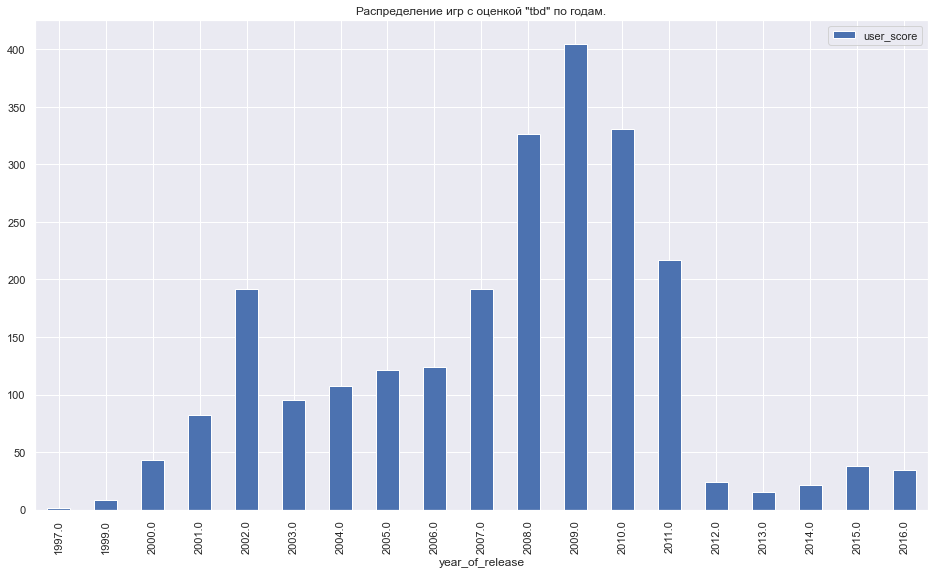

In [374]:
sns.set(rc={'figure.figsize':(16, 9)})

(data
 .query('user_score == "tbd"')
 .sort_values(by = 'year_of_release')
 .pivot_table(index=['year_of_release'], 
              values='user_score', 
              aggfunc='count')
 .plot(kind = 'bar', 
       grid = True, 
       title = 'Распределение игр с оценкой "tbd" по годам.'))

**Промежуточный вывод**
Наибольшее число игр без оценки пользователей были выпущены в период 2001 - 2011 гг. Игр, вышедших в последние 6 лет, без оценок пользователей относительно немного, поэтому наличие значительного числа игр без оценок нельзя объяснить тем, что их просто не успели оценить.

Такое распределение игр без пользовательских оценок по годам можно объяснить поведением самих пользователей (а именно их активностью в оценки игр).

*Относительно малое число самых ранних игр (выпуск до 2001 г.) без пользовательских оценок вероятно можно объяснить следующими причинами:*
* В самые ранние игры успело поиграть много людей, поэтому и оценок пользователи оставили достаточно.
* В самые ранние игры играют люди, увлекающиеся игровой тематикой (причем неважно, когда в них играют, в год релиза или же значительно позже). От таких людей следует ожидать большую активность в оценивании игр, потому что они хотят поделиться своим опытом с сообществом, частью которого они себя сами считают.

*Относительно большое число игр выпуска 2001-2011 гг. без пользовательских оценок вероятно можно объяснить следующими причинами:*
* В эти годы сообщество любителей компьтерных игр росло не такими темпами, как число новых игр. Возможно, для такого количества игр просто не хватало игроков настолько активных, чтобы у них возникало желание оставлять свои оценки.
* Возможно, с ростом числа новых игр сервисы, где игроки могли оставлять свои оценки, только начали активно развиваться. И низкая активность игроков в оценивании игр можно объяснить непопклярностью данных сервисов в силу их возможного несовершенства (или об этих сервисах мало было кому известно).

*Относительно малое число игр выпуска с 2011 г. без пользовательских оценок вероятно можно объяснить следующими причинами:*
* Рассвет игровой инудустрии.
* Баланс численности сообщества и количества выпускаемх игр.
* Упрощение процесса оценивания игр и увеличение прозрачности определения рейтинга игры.

Несмотря на то, что такое распределение ***количества игр*** без оценок от пользователей можно объяснить множеством факторов, следует рассмотреть распределение ***доли таких игр*** от общего числа игр. Возможно, например, что в 2000 г. всего быпущено было 100 игр и из них почти 50 оказались без оценки (т. е. почти 50%), а для того же 2009 г. около 400 не оцененных пользователями игр это незначительная часть.

<AxesSubplot:title={'center':'Распределение доли игр с оценкой "tbd" по годам'}, xlabel='year_of_release'>

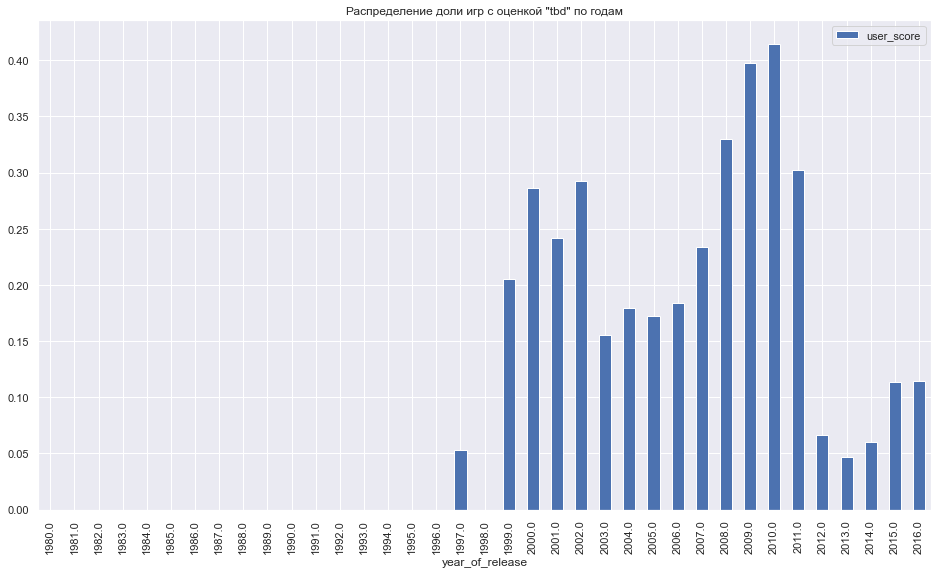

In [375]:
share_tbd_year_data = (data
 .query('user_score == "tbd"')
 .sort_values(by = 'year_of_release')
 .pivot_table(index=['year_of_release'], 
              values='user_score', 
              aggfunc='count'))/(data
                                 .sort_values(by = 'year_of_release')
                                 .pivot_table(index=['year_of_release'], 
                                              values='user_score', 
                                              aggfunc='count'))

(share_tbd_year_data
 .plot(kind = 'bar', 
       grid = True, 
       title = 'Распределение доли игр с оценкой "tbd" по годам'))

Распределение доли игр с оценкой `"tbd"` имеет похожую картинку с количеством игр. Поэтому можно сделать вывод, что нет четкой связи года выпуска игр с отсутсвием оценки.

<AxesSubplot:title={'center':'Распределение игр с оценкой "tbd" по игровым платформам.'}, xlabel='platform'>

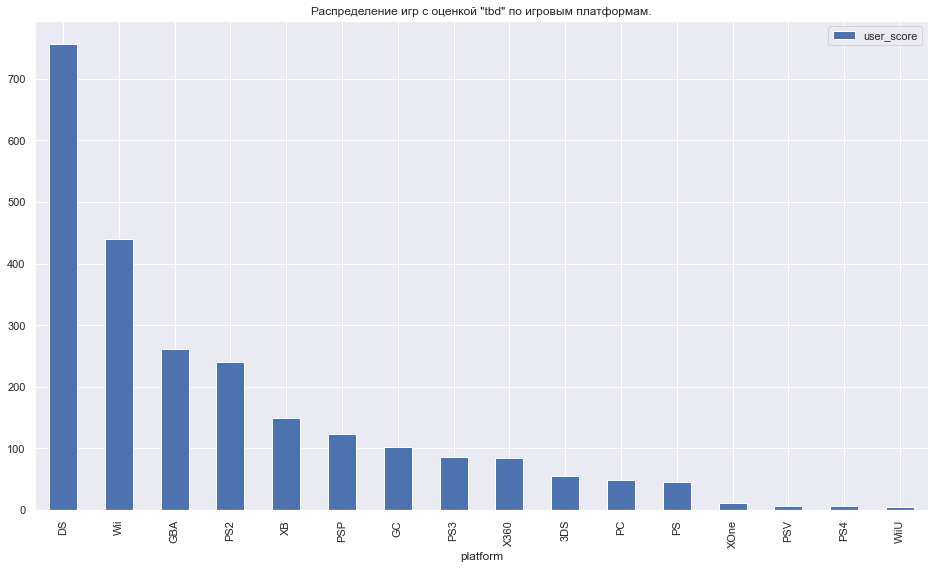

In [376]:
sns.set(rc={'figure.figsize':(16, 9)})
(data
 .query('user_score == "tbd"')
 .pivot_table(index=['platform'], 
              values='user_score', 
              aggfunc='count')
 .sort_values(by='user_score',
             ascending = False)
 .plot(kind = 'bar',
      grid = True, 
       title = 'Распределение игр с оценкой "tbd" по игровым платформам.'))


Построим тепловую карту распределения игр с оценкой `tbd`. Это наиболее наглядный инструмент.

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

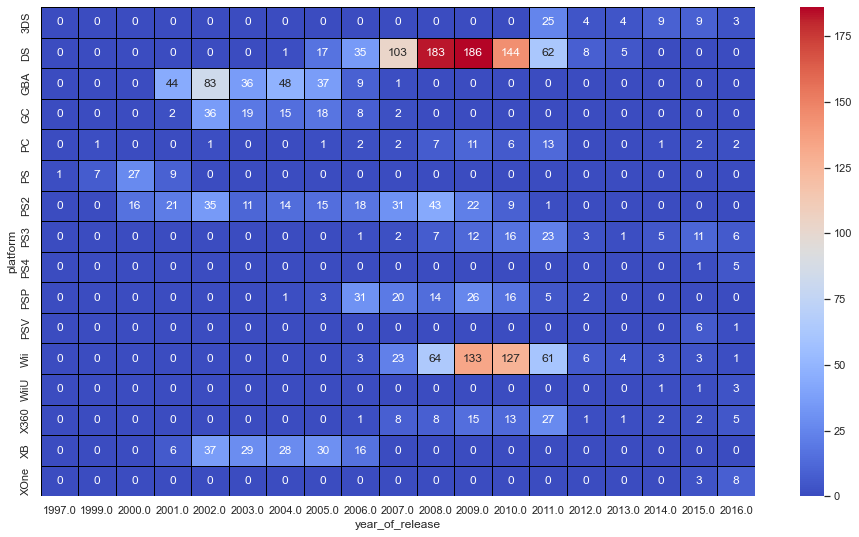

In [377]:
sns.set(rc={'figure.figsize':(16, 9)})

sns.heatmap(data
 .query('user_score == "tbd"')
 .pivot_table(index = 'platform', 
              columns = 'year_of_release', 
              values = 'user_score', 
              aggfunc='count')
 .fillna(0).astype('int64'), 
            cmap = 'coolwarm', 
            linewidths=1, 
            linecolor='black',
            annot = True,
            fmt='.3g')

#### **Промежуточный вывод**
* Наибольшее число игр с оценкой `tbd` выпущены на платформах `DS`, `Wii`, `GBA`.
* Наибольшее число игр с оценкой `tbd` выпущены в  период 2001-2011 гг.

Следует заменить значение `tbd` на пропуск данных, поскольку нет возможности заполнить его иначе. А сам факт такого значения, дает определенную информацию.

Нет предела совершенства, и можно было бы дальше анализировать, но, мне кажется уже, достаточно внимания было уделено этому значению

In [378]:
# Сохраним переменную, сохраняющую информацию по оценкам 'tbd'
data['tbd'] = data['user_score'] == 'tbd'

# Заменяем 'tbd' на пропуск в данных.
data['user_score'] = data['user_score'].replace('tbd', np.nan)

# Изменяем тип данных
data['user_score'] = data['user_score'].astype('float64')

#### 2.3.1 Столбец `year_of_release`

Чтобы заменить тип данных для столбца `year_of_release` на целочисленный, необходимо заполнить пропуски какими-то целочисленными значениями (особенность типа `int64`, что он не может содержать значения `NaN`). Замена типа, это в данном случае вопрос удобства. Я выбираю отсавить пропуски как `NaN` и не менять тип данных.

### 2.4 Работа с пропусками

#### 2.3.1 Общая ситуация с пропусками

In [379]:
# расчитаем число и долю пропусков по каждой характеристики
def nan_statistics(data):
    nan_count_share = pd.concat([data.isna().sum(), data.isna().sum()/data.shape[0]], axis=1)
    nan_count_share.columns = ['count', 'share']
    return nan_count_share

nan_statistics(data)

,count,share
name,1,0.000060
platform,0,0.000000
year_of_release,268,0.016036
genre,1,0.000060
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000
other_sales,0,0.000000
critic_score,8577,0.513224
user_score,9124,0.545955


#### **Промежуточный вывод**

* В столбцах `name` и `genre` пропуски можно отбросить.


* В столбцах `user_score`, `critic_score`, `rating` пропуссков много (40%-55%). Но заменять их на каки-либо значения не представляется целесообразным, поскольку это существенно сместит результаты анализа.


* В столбце `year_of_release` можно попробовать заменить пропуски на год выпуска игры с тем же названием, но на другой платформе.

#### 2.3.2 Устранение выявленных проблем с пропусками

In [380]:
# Попытка заполнить пропущенные значения в дате релиза
for i in data[data['year_of_release'].isna() == True].index:
    unique_name = (data['name']
                   .str.lower()
                   .str.replace(' ',''))
    
    data.loc[i, 'year_of_release'] = data.loc[(data['name']
                                               .str.lower()
                                               .str.replace(' ','')) == unique_name[i], 'year_of_release'].min()

# Проверка
data['year_of_release'].isna().sum()

146

</font><font color='Blue'><b>По аналогии заполним пропуски в столбце `rating`</b></font><br>

In [381]:
# Попытка заполнить пропущенные значения в столбце рейтинг
data['rating'].fillna('unknown', inplace = True)

for i in data[data['rating'].isna() == True].index:
    unique_name = (data['name']
                   .str.lower()
                   .str.replace(' ',''))
    
    data.loc[i, 'rating'] = data.loc[(data['name']
                                      .str.lower()
                                      .str.replace(' ','')) == unique_name[i], 'rating'].min()

In [382]:
# Уберем игру без жанра
data.dropna(subset=['genre'], inplace=True)
nan_statistics(data)

# удалили одно наблюдение. Оказалось, что эта игра и было без имени.

,count,share
name,0,0.000000
platform,0,0.000000
year_of_release,146,0.008737
genre,0,0.000000
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000
other_sales,0,0.000000
critic_score,8576,0.513195
user_score,9123,0.545928


</font><font color='Blue'><b>Проблема с пропусками в столбце рейтинг решена.</b></font><br>

In [383]:
# Сумируем продажи по всем регионам и сохраняемв отдельный столбец
data['total_sales'] = data.loc[:,['na_sales', 
                                  'eu_sales', 
                                  'eu_sales', 
                                  'jp_sales', 
                                  'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,False,111.50
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,False,43.82
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,False,48.28
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,False,43.70
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,False,40.27


### Вывод по предобработке
* Преобразованы названия столбцов (приведены к нижнему регистру)
* Произведен поиск и очистка данных от явных и неявных дубликатов в текстовых стоблбцах.
* Изменены типы данных в столбцах в соответствии с их интерпретацией
* Удалены пропуски, где это было целесообразно.
* Рассчитаны совокупные продажи по всем регионам (столбец `total_sales`).

In [384]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-------------------------')
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16711 entries, 0 to 16711
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16711 non-null  object 
 2   year_of_release  16565 non-null  float64
 3   genre            16711 non-null  object 
 4   na_sales         16711 non-null  float64
 5   eu_sales         16711 non-null  float64
 6   jp_sales         16711 non-null  float64
 7   other_sales      16711 non-null  float64
 8   critic_score     8135 non-null   float64
 9   user_score       7588 non-null   float64
 10  rating           16711 non-null  object 
 11  tbd              16711 non-null  bool   
 12  total_sales      16711 non-null  float64
dtypes: bool(1), float64(8), object(4)
memory usage: 1.7+ MB
None
-------------------------
name ["'98 Koshien" '.hack//G.U. Vol.1//Rebirth' '.hack//G.U. Vol.2//Reminisce'
 ... 'uDraw Studio: Instant A

In [385]:
display(data[data['year_of_release'].isna()].head(10))
# Не во всех наблюдениях без года выпуска отсутсвуют оценки пользователей, критиков и рейтинг.
# Но самих пропусков осталось только 146, поэтому лучше просто их все отбросить.

data.dropna(subset = ['year_of_release'], inplace = True)

data['rating'].fillna('unknown', inplace = True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd,total_sales
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.0,0.41,NaN,NaN,unknown,False,4.02
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T,False,2.80
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,NaN,E,True,2.58
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T,False,2.65
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T,False,2.03
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.0,0.10,NaN,NaN,unknown,False,2.01
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.0,0.01,NaN,NaN,unknown,False,1.38
1585,Combat,2600,NaN,Action,1.17,0.07,0.0,0.01,NaN,NaN,unknown,False,1.32
1840,Rock Band,PS2,NaN,Misc,0.71,0.06,0.0,0.35,82.0,6.8,T,False,1.18
1984,Legacy of Kain: Soul Reaver,PS,NaN,Action,0.58,0.40,0.0,0.07,91.0,9.0,T,False,1.45


## Шаг 3. Исследовательский анализ данных

### 3.1 Продажи игр по годам

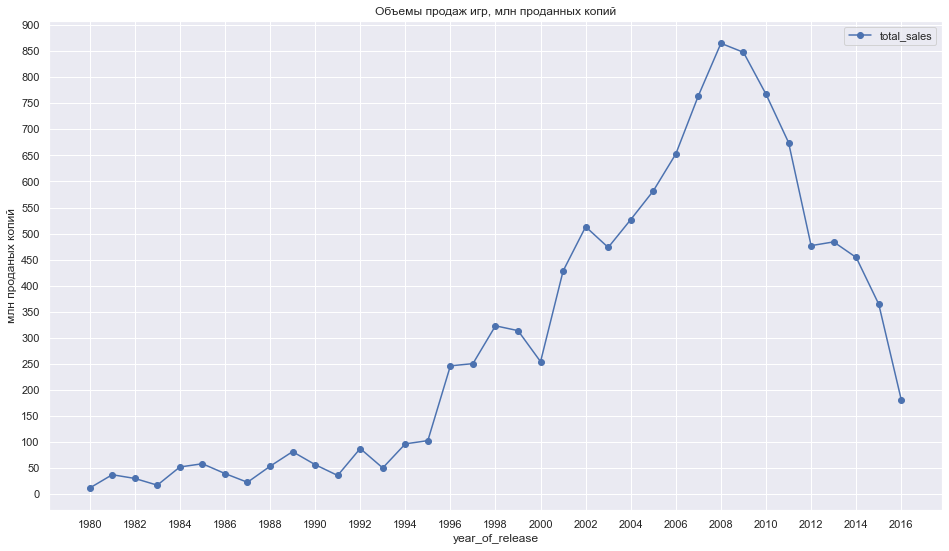

In [386]:
ax = (data.pivot_table(index = 'year_of_release', 
                  values = 'total_sales', 
                  aggfunc = 'sum')
 .reset_index(drop=False)
 .plot(x = 'year_of_release', 
       y = 'total_sales', 
       kind = 'line', 
       marker = 'o', 
       title = 'Объемы продаж игр, млн проданных копий', ylabel = 'млн проданых копий'))

ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

#### **Промежуточный вывод**

**Весь период** продаж не нужен для анализа наиболее востребованных жанров игр в **текущий момент**.  По графику, представленному выше, стоит выбрать данные с 2000 г., условного расцвета игровой индустрии. Именно в это время начинают складываться полноценные сообщества любителей игр (отдельных жанров), а значит, с этого периода можно говорить о сложившихся предпочтениях, выявить которые является нашей задачей.

### 3.2 Выбор наиблее актуальных платформ

<AxesSubplot:xlabel='platform', ylabel='млн проданных копий'>

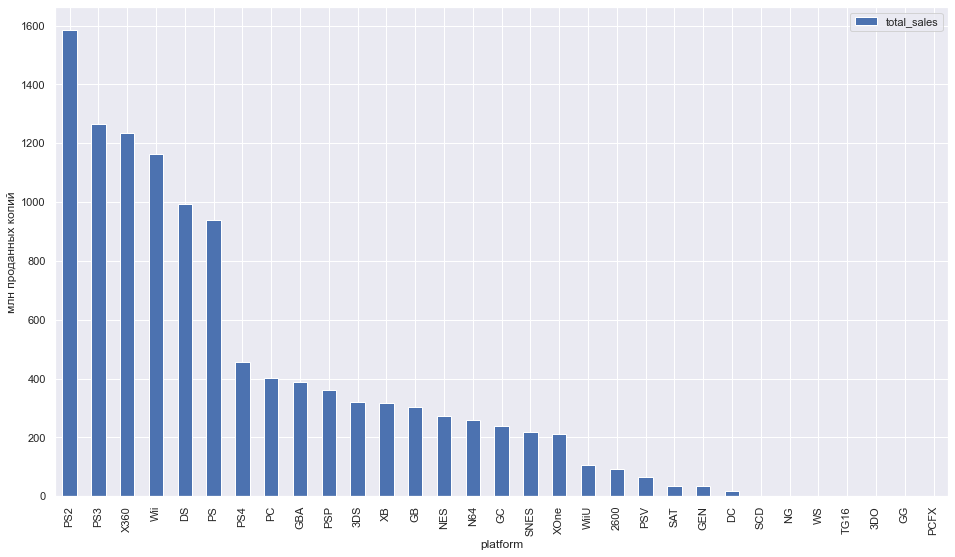

In [387]:
(data.pivot_table(index='platform', 
                  values='total_sales', 
                  aggfunc='sum')
 .sort_values('total_sales', ascending=False)
 .plot(kind='bar', 
       ylabel = 'млн проданных копий'))

#### **Промежуточный вывод**

К наиболее популярным платформам по числу продаж следует отнести: **`PS2`**, **`PS3`**, **`X360`**,**`Wii`**, **`DS`**, **`PS`**.
С ощутимым отставанием идут платформы: **`PS4`**, **`PC`**, **`GBA`**,**`PSP`**.
__________________

Однако этих сведений недостаточно для опеределения наиболее актуальных платформ на момент 2017 г. Следует рассмотреть объемы продаж каждой платформы по годам. Причем нужно также рассмотреть доли продаж каждой платформ от общего объема продаж игр в отдельный год.

In [388]:
def heatmap(data, index, columns, values, aggfunc, annot = False):
    sns.set(rc={'figure.figsize':(16, 9)})
    pivot_data = (data
                  .pivot_table(index = index, 
                               columns = columns, 
                               values = values, 
                               aggfunc = aggfunc)
                  .fillna(0))
    
    sns.heatmap(pivot_data, 
            cmap = 'coolwarm', 
            linewidths=1, 
            linecolor='black',
            annot = annot)
    
    return None

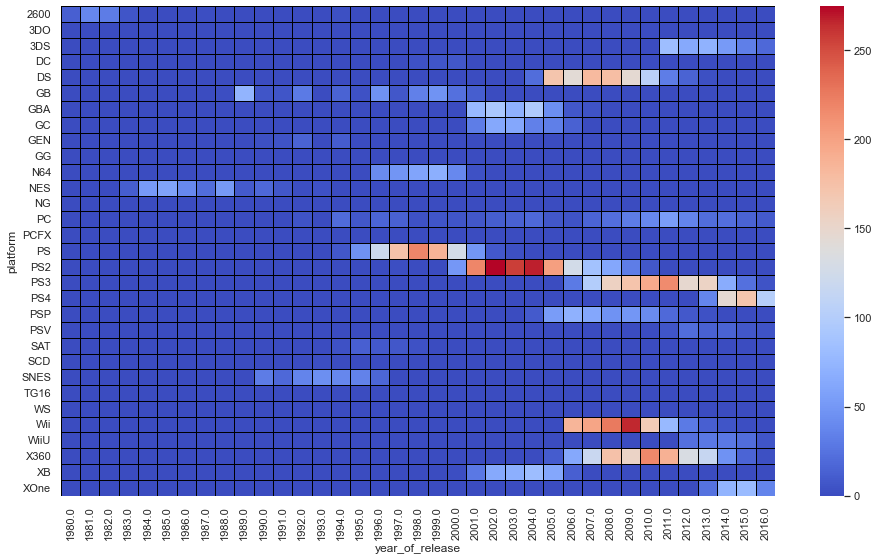

In [389]:
heatmap(data, 'platform', 'year_of_release', 'total_sales', 'sum')

#### **Промежуточный вывод**

На тепловой карте представленной выше можно примерно оценить цикл жизни игровой платформы (8-12 лет в среднем). Соответственно, нужно ориентироваться на платформы, продажи которых в 2017 г. предположительно должны выходить на пик в наилучшем случае или, по крайней мере, активная фаза жизни этих платформ должна включать 2017 г.

In [390]:
def share_heatmap(data, index, columns, values, aggfunc, annot = False):
    sns.set(rc={'figure.figsize':(16, 9)})
    pivot_data = (data
                  .pivot_table(index = index, 
                               columns = columns, 
                               values = values, 
                               aggfunc = aggfunc)
                  .fillna(0))
    
    for col_name in pivot_data.columns:
        pivot_data[col_name] = (pivot_data[col_name] / pivot_data[col_name].sum())
    
    sns.heatmap(pivot_data, 
            cmap = 'coolwarm', 
            linewidths=1, 
            linecolor='black',
            annot = annot)
    
    return None

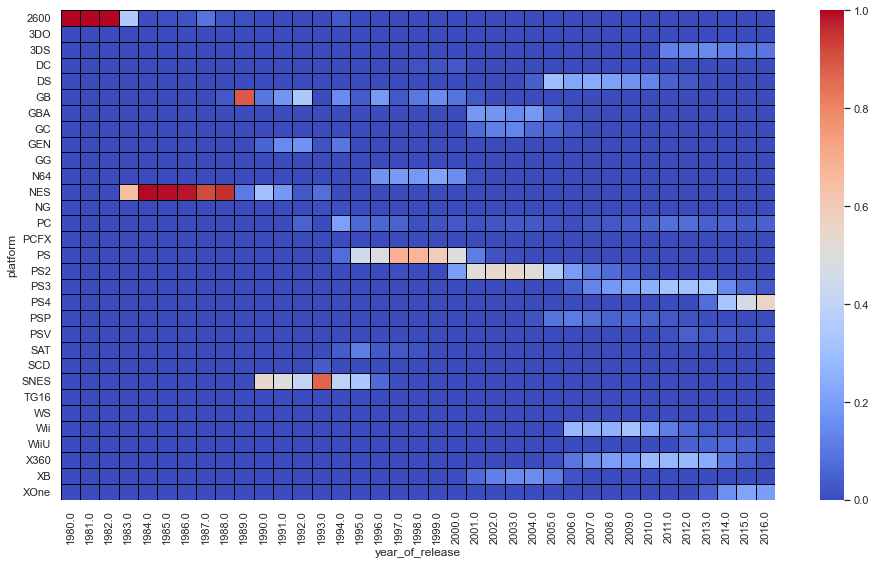

In [391]:
share_heatmap(data, 'platform', 'year_of_release', 'total_sales', 'sum')

#### **Промежуточный вывод**

Если посмотреть на распределение доли проданных игр по годам, то наиболее перспективными платформами с точки зрения продаж игр в 2017 г. можно однозначно считать `Xone` и `PS4`. Если исходить из предположения, что цикл активной жизни у платформы моставляет примерно 10 лет, то именно эти платформы должны будут выходить на пик.

**Таким образом, актуальным периодом для анализа будем считать данные с 2012 г.**

<AxesSubplot:xlabel='platform'>

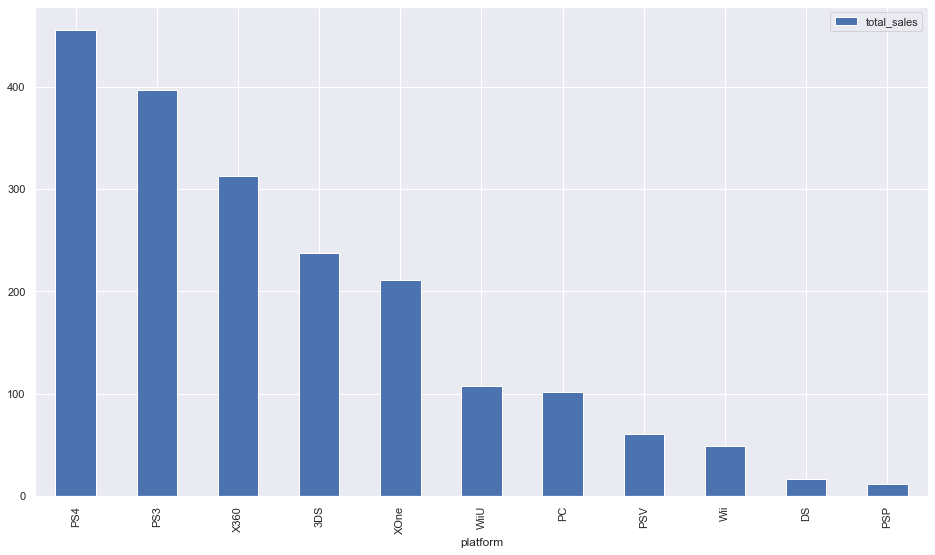

In [392]:
relevant_period = [data['year_of_release'].max()-4, data['year_of_release'].max()]
(data[data['year_of_release'] >= relevant_period[0]]
 .pivot_table(index='platform', 
                  values='total_sales', 
                  aggfunc='sum')
 .sort_values('total_sales', ascending=False)
 .plot(kind='bar'))

In [393]:
relevant_data = data[data['year_of_release'] >= relevant_period[0]]

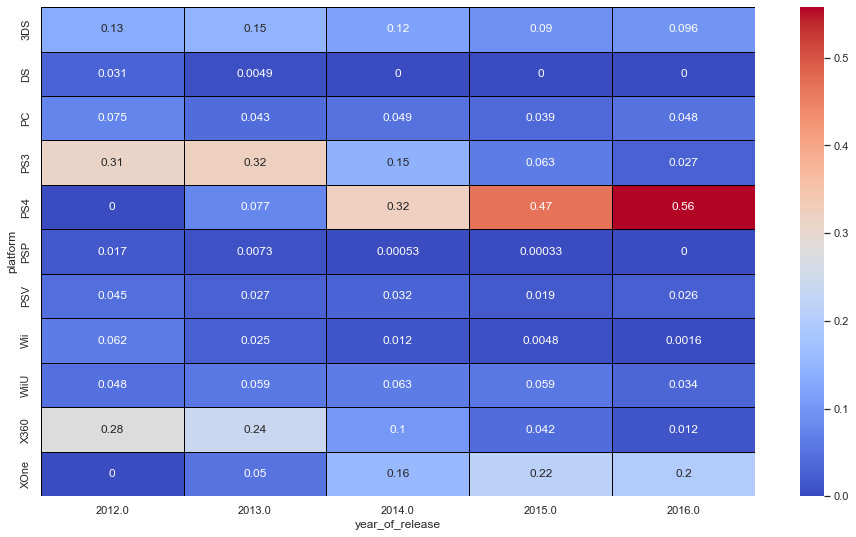

In [394]:
share_heatmap(relevant_data, 'platform', 'year_of_release', 'total_sales', 'sum', True)

Из 12 платформ, для которых продавались игры с 2010 г., **непопулярными** на момент 2017 г. можно признать следующие платформы, как вымирающие: **`DS`**, **`PS2`**, **`PSP`**, **`Wii`**, **`X360`**.

Самые популярные платформы на момент 2017 г. вероятнее всего будут **`PS4`**, **`XOne`**, **`3DS`**, **`PC`**, **`WiiU`**. Первые две платформы будем считать приоритетными.

In [395]:
popular_platforms = ['PS4', 'XOne', '3DS', 'PC', 'WiiU']

### 3.3 "Ящики с усами" для наиболее актуальных платформ

In [396]:
def sales_by_platform_boxplot(data, platform):
    
    sales_by_platform = data.loc[data['platform'] == platform, 'total_sales']
    q1 = sales_by_platform.quantile(0.25)
    q3 = sales_by_platform.quantile(0.75)
    iqr = q3-q1
    
    print('_'*100)
    print('_'*(len(platform)+1))
    print(platform)
    print('_'*(len(platform)+1))
    print('Среднее глобальных продаж на PS4: {:.3f}'.format(sales_by_platform.mean()), 'млн проданных копий игры.')
    print('Медиана глобальных продаж на PS4: {:.3f}'.format(sales_by_platform.median()), 'млн проданных копий игры.')
    print('Количество выбросов справа: {:.0f}'.format(sum(sales_by_platform > q3+1.5*iqr)), 
          'наблюдений ({:.1%})'.format(sum(sales_by_platform > q3+1.5*iqr)/len(sales_by_platform)))
    print('Количество выбросов слева: {:.0f}'.format(sum(sales_by_platform < q1-1.5*iqr)), 
          'наблюдений ({:.1%})'.format(sum(sales_by_platform < q1-1.5*iqr)/len(sales_by_platform)))
    print('Правый ус {:.3f}'.format(q3+1.5*iqr))
    
    return None

In [397]:
popular_platforms = ['PS4', 'XOne', '3DS', 'PC', 'WiiU']

for platform in popular_platforms:
    sales_by_platform(relevant_data, platform)

____________________________________________________________________________________________________
____
PS4
____
Среднее глобальных продаж на PS4: 1.161 млн проданных копий игры.
Медиана глобальных продаж на PS4: 0.280 млн проданных копий игры.
Количество выбросов справа: 54 наблюдений (13.8%)
Количество выбросов слева: 0 наблюдений (0.0%)
Правый ус 2.451
____________________________________________________________________________________________________
_____
XOne
_____
Среднее глобальных продаж на PS4: 0.854 млн проданных копий игры.
Медиана глобальных продаж на PS4: 0.300 млн проданных копий игры.
Количество выбросов справа: 26 наблюдений (10.5%)
Количество выбросов слева: 0 наблюдений (0.0%)
Правый ус 2.218
____________________________________________________________________________________________________
____
3DS
____
Среднее глобальных продаж на PS4: 0.599 млн проданных копий игры.
Медиана глобальных продаж на PS4: 0.130 млн проданных копий игры.
Количество выбросов справа: 50

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

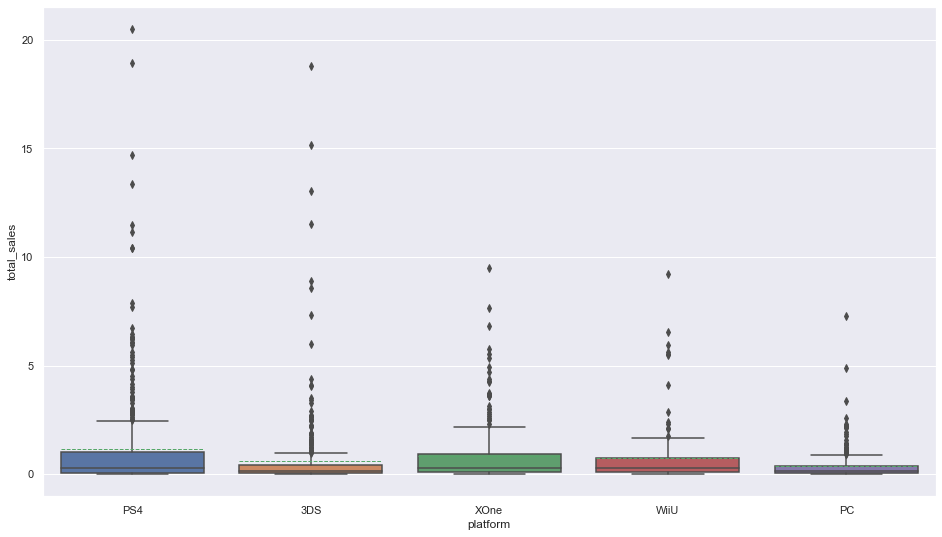

In [398]:
sns.boxplot(x='platform', 
            y='total_sales', 
            data=relevant_data[relevant_data['platform'].isin(popular_platforms)], 
            showmeans = True, 
            meanline = True)

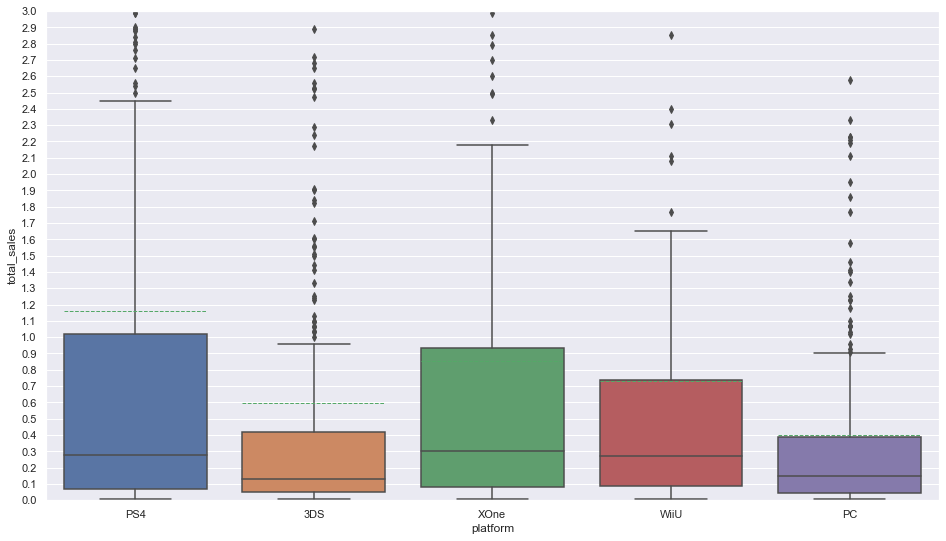

In [399]:
ax = sns.boxplot(x='platform', 
            y='total_sales', 
            data=relevant_data[relevant_data['platform'].isin(popular_platforms)], 
            showmeans = True, 
            meanline = True)
plt.ylim(0, 3)

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))

#### **Промежуточный вывод**
* Для каждой популярной платформы характерно наличие игр-бестселлеров, которые продаются огромными количествами копий и смещают среднее значение проданных копий по выборке.
* Доля выбросов по популярным платформам составляет от 8,8% до 13,8%. Причем все выбросы находятся справа.
* В нашем исследовании выбросы представяют особый интерес. Чем больше игр-бестселлеров у платформы, тем она более привлекательна для нас.
* По объемам продаж с отрывом лидируют мединанные игры на платформах `PS4`, `XOne`, `WiiU` (**медианная игра на этих платформах продается примерно примерно 270-300 тыс. копий**). Возможно, именно для этих платформ выпускаются эксклюзивные игры с высокими продажами.

### 3.4 Влияние оценок пользователей и критиков на продажи

In [400]:
ps4_data = relevant_data[relevant_data['platform'] == 'PS4'].dropna(subset = ['total_sales'])
xone_data = relevant_data[relevant_data['platform'] == 'XOne'].dropna(subset = ['total_sales'])
corr_list = ['total_sales', 'user_score', 'critic_score']

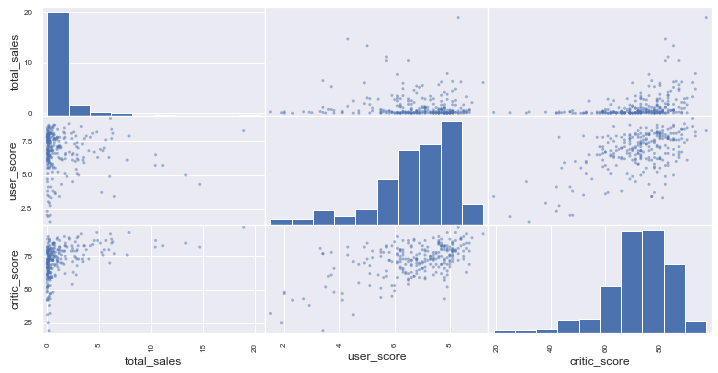

____________________________________________________________________________________________________
____
PS4
____
              total_sales  user_score  critic_score
total_sales      1.000000   -0.038308      0.389944
user_score      -0.038308    1.000000      0.557654
critic_score     0.389944    0.557654      1.000000


In [401]:
pd.plotting.scatter_matrix(ps4_data[corr_list], figsize=(12, 6))
plt.show()
print('_'*100)
print('_'*(len('PS4')+1))
print('PS4')
print('_'*(len('PS4')+1))
print(ps4_data[corr_list].corr())

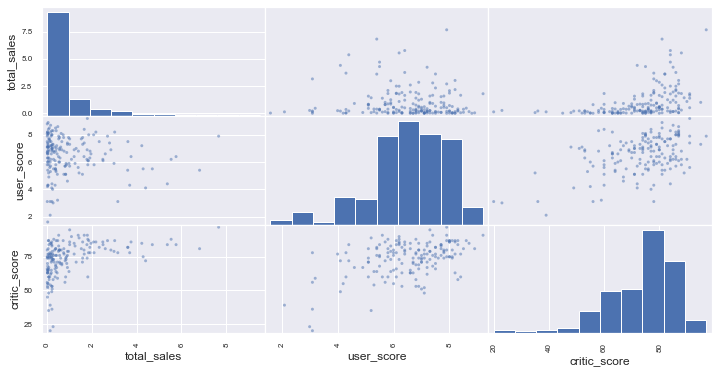

____________________________________________________________________________________________________
_____
XOne
_____
              total_sales  user_score  critic_score
total_sales      1.000000   -0.067145      0.417843
user_score      -0.067145    1.000000      0.472462
critic_score     0.417843    0.472462      1.000000


In [402]:
pd.plotting.scatter_matrix(xone_data[corr_list], figsize=(12, 6))
plt.show()
print('_'*100)
print('_'*(len('XOne')+1))
print('XOne')
print('_'*(len('XOne')+1))
print(xone_data[corr_list].corr())

#### **Промежуточный вывод**
Не выявлено явной связи между оценками и объемами продаж. Возможно, стоит разделить выборки на условные бестселлеры и обычные игры. Успешными будем считать игры, которые мы бы считали выбросами по объемам продаж.

СОЗДАДИМ ФУНКЦИЮ ДЛЯ РАСЧЕТА КОРРЕЛЯЦИЙ И ПОСТРОЕНИЕ ДИАГРАММ РАССЕЯНИЯ

In [403]:
def corr_sale_plot(data, platform, corr_list, sale_limit, anomalies = None, corr_matrix = False):
#   Формируем подвыборку и убираем пропуски.
    platform_data = data[data['platform'] == platform].dropna(subset = ['total_sales'])
    
    try:
#       Для всех наблюдений
        if anomalies == None:
            if corr_matrix == True:
                pd.plotting.scatter_matrix(platform_data[corr_list], figsize=(12, 6))
                plt.show()
                
            print('_'*100)
            print('_'*(len(platform)+1))
            print(platform)
            print('_'*(len(platform)+1))
            print(platform_data[corr_list].corr())

#       Для наблюдений без выбросов    
        elif anomalies == False:
            no_anomalies_sale_data = platform_data[platform_data['total_sales'] < sale_limit]
            
            if corr_matrix == True:
                pd.plotting.scatter_matrix(no_anomalies_sale_data[corr_list], figsize=(12, 6))
                plt.show()
                
            print('_'*100)
            print('_'*(len(platform)+1))
            print(platform)
            print('_'*(len(platform)+1))
            print(no_anomalies_sale_data[corr_list].corr())

#       Для выбросов
        elif anomalies == True:       
            anomalies_sale_data = platform_data[platform_data['total_sales'] > sale_limit]
            
            if corr_matrix == True:
                pd.plotting.scatter_matrix(anomalies_sale_data[corr_list], figsize=(12, 6))
                plt.show()
                
            print('_'*100)
            print('_'*(len(platform)+1))
            print(platform)
            print('_'*(len(platform)+1))
            print(anomalies_sale_data[corr_list].corr())
            
        else:
            print('Неверно указан параметр №5 "anomalies" (None, True, False).')
    
    except:
        print('Вероятно при заданных праметра массив данных для расчета пуст.')
        print('Измените параметры!')

    return None

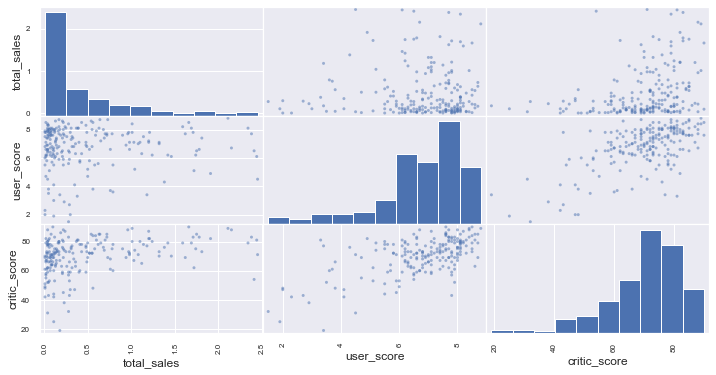

____________________________________________________________________________________________________
____
PS4
____
              total_sales  user_score  critic_score
total_sales      1.000000    0.020284      0.320994
user_score       0.020284    1.000000      0.619371
critic_score     0.320994    0.619371      1.000000


In [404]:
# Расчет корреляций для платформы 'PS4' (наблюдения без выбросов).
corr_sale_plot(data, 'PS4', corr_list, 2.451, False, True)

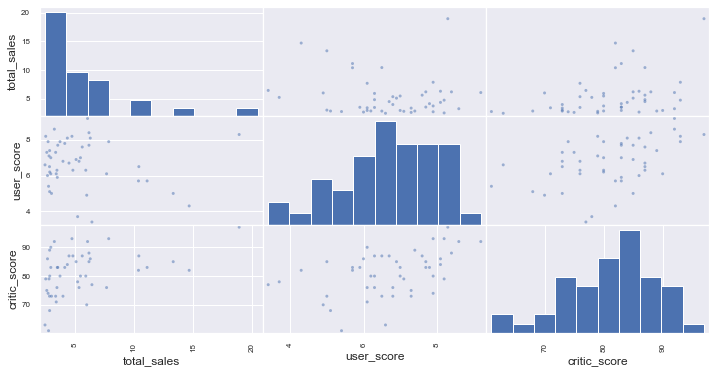

____________________________________________________________________________________________________
____
PS4
____
              total_sales  user_score  critic_score
total_sales      1.000000   -0.136309      0.401020
user_score      -0.136309    1.000000      0.466141
critic_score     0.401020    0.466141      1.000000


In [405]:
# Расчет корреляций для платформы 'PS4' (только выбросы).
corr_sale_plot(data, 'PS4', corr_list, 2.451, True, True)

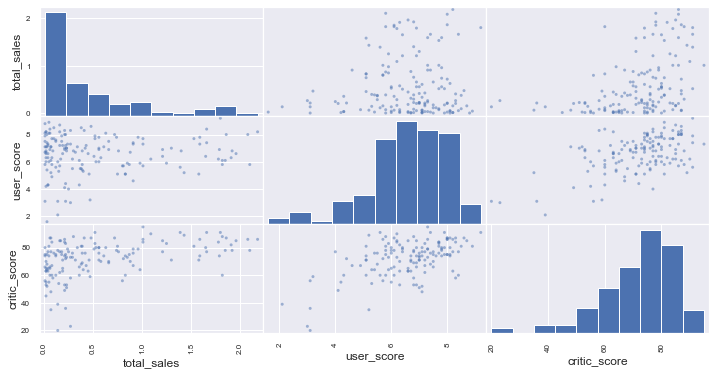

____________________________________________________________________________________________________
_____
XOne
_____
              total_sales  user_score  critic_score
total_sales      1.000000    0.074335      0.426221
user_score       0.074335    1.000000      0.541183
critic_score     0.426221    0.541183      1.000000


In [406]:
# Расчет корреляций для платформы 'XOne' (наблюдения без выбросов).
corr_sale_plot(data, 'XOne', corr_list, 2.218, False, True)

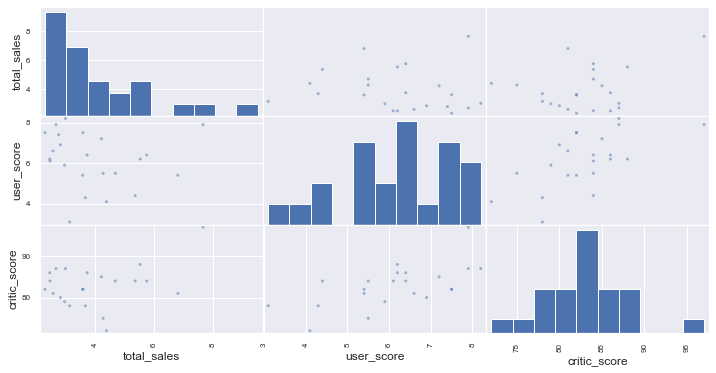

____________________________________________________________________________________________________
_____
XOne
_____
              total_sales  user_score  critic_score
total_sales      1.000000   -0.122075      0.340769
user_score      -0.122075    1.000000      0.625067
critic_score     0.340769    0.625067      1.000000


In [407]:
# Расчет корреляций для платформы 'XOne' (наблюдения без выбросов).
corr_sale_plot(data, 'XOne', corr_list, 2.218, True, True)

In [408]:
for platform in popular_platforms[2:]:
    corr_sale_plot(data, platform, corr_list, 2.218, None, False)

____________________________________________________________________________________________________
____
3DS
____
              total_sales  user_score  critic_score
total_sales      1.000000    0.210021      0.340457
user_score       0.210021    1.000000      0.744286
critic_score     0.340457    0.744286      1.000000
____________________________________________________________________________________________________
___
PC
___
              total_sales  user_score  critic_score
total_sales      1.000000    0.001394      0.251639
user_score       0.001394    1.000000      0.555203
critic_score     0.251639    0.555203      1.000000
____________________________________________________________________________________________________
_____
WiiU
_____
              total_sales  user_score  critic_score
total_sales      1.000000    0.405844      0.354408
user_score       0.405844    1.000000      0.770080
critic_score     0.354408    0.770080      1.000000


In [409]:
for platform in popular_platforms[2:]:
    corr_sale_plot(data, platform, corr_list, 2.218, False, False)

____________________________________________________________________________________________________
____
3DS
____
              total_sales  user_score  critic_score
total_sales      1.000000    0.139406      0.274587
user_score       0.139406    1.000000      0.722299
critic_score     0.274587    0.722299      1.000000
____________________________________________________________________________________________________
___
PC
___
              total_sales  user_score  critic_score
total_sales      1.000000   -0.026603      0.283601
user_score      -0.026603    1.000000      0.569365
critic_score     0.283601    0.569365      1.000000
____________________________________________________________________________________________________
_____
WiiU
_____
              total_sales  user_score  critic_score
total_sales      1.000000    0.421992      0.377417
user_score       0.421992    1.000000      0.749289
critic_score     0.377417    0.749289      1.000000


In [410]:
for platform in popular_platforms[2:]:
    corr_sale_plot(data, platform, corr_list, 2.218, True, False)

____________________________________________________________________________________________________
____
3DS
____
              total_sales  user_score  critic_score
total_sales      1.000000    0.152249      0.255243
user_score       0.152249    1.000000      0.848305
critic_score     0.255243    0.848305      1.000000
____________________________________________________________________________________________________
___
PC
___
              total_sales  user_score  critic_score
total_sales      1.000000   -0.003583      0.212508
user_score      -0.003583    1.000000      0.498091
critic_score     0.212508    0.498091      1.000000
____________________________________________________________________________________________________
_____
WiiU
_____
              total_sales  user_score  critic_score
total_sales      1.000000    0.691897      0.612977
user_score       0.691897    1.000000      0.952378
critic_score     0.612977    0.952378      1.000000


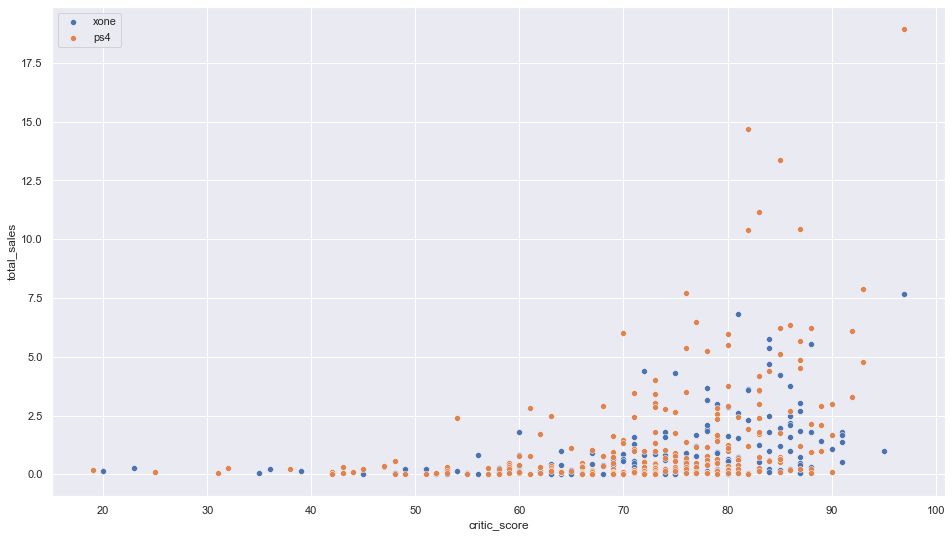

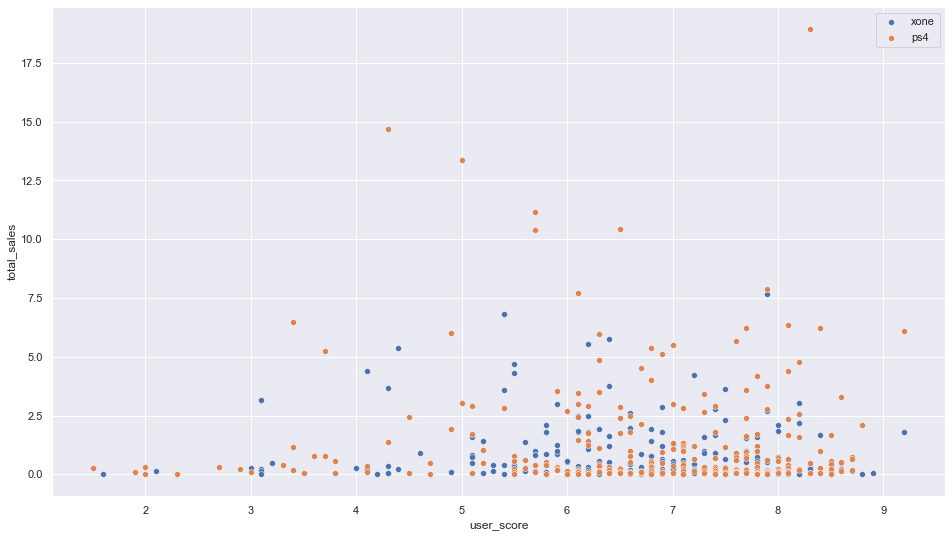

In [411]:
row = ['critic_score', 'user_score']
for i in row:
    sns.scatterplot(x=i, y="total_sales", label='xone', data=xone_data)
    sns.scatterplot(x=i, y="total_sales", label='ps4', data=ps4_data)
    plt.show()

### Вывод по влиянию оценок пользователей и критиков на продажи
Платфоррмы `PS4` и `XOne`:
* Связи между оценками пользователей и продажами не выявлено. Причем этот результат устойчив к разделению выборки на наблюдения без выбросов и на только выбросы.

* Связи между оценками критиков и продажами не выявлено. Причем этот результат устойчив к разделению подвыборке  без выбросов. Слабая положительная связь между оценками критиков и продажами выявлена только на подвыборке с выбросами.

Остальные платформы:
* Для некотрых платформ наблюдается положительная (в среднем слабая) связь между оценками критиками и продажами (по всей выборке игр).

* Для этих платформ по подвыборке без выбросов наблюдается положительная связь между оценками критиков и продажами.

* Для этих платформ по подвыборке выбросов наблюдается положительная связь между продажами и оценками как критиков, так и самих пользователей. Но связь с оценками критиков сильнее возможно при покупке игры игроки больше ориентируются на отзывы критиков. Обычно критики оценивают игры раньше, а значит, формируют ожидания, которые уже влияют на продажи (особенно на первых этапах продаж).

### 3.5 Влияние оценок пользователей и критиков на продажи

#### 3.5.1 Общее распределение игр по жанрам.

<AxesSubplot:xlabel='genre'>

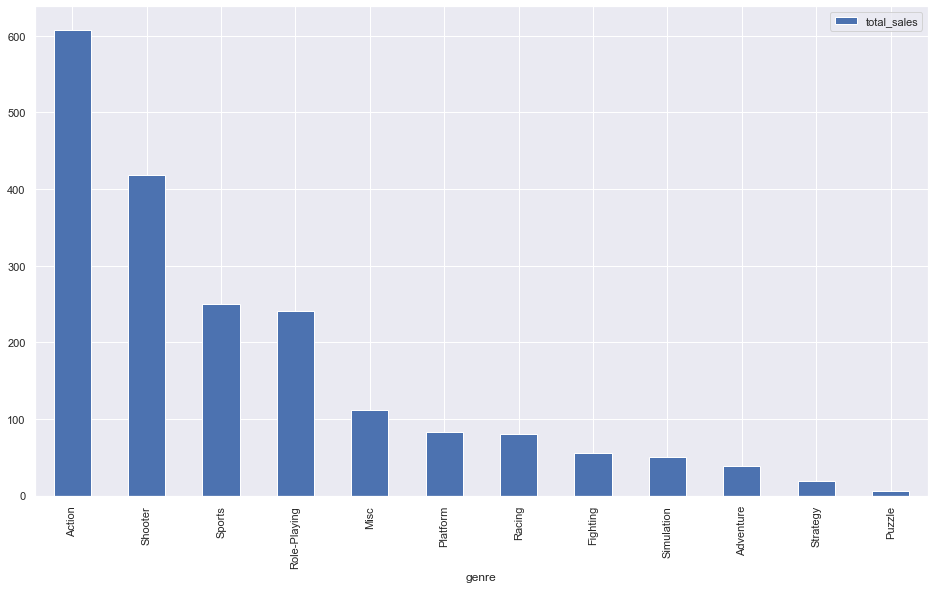

In [412]:
(relevant_data
 .pivot_table(index='genre', 
              values='total_sales', 
              aggfunc='sum')
 .sort_values('total_sales', ascending=False)
 .plot(kind='bar'))

#### **Промежуточный вывод**
За период 2010-2016 гг. самыми продаваемыми жанрами оказались **`Action`**, **`Shooter`**, **`Sports`**, **`Role-Playing`**, **`Misc`** (эта собирательная категория "разное", с англ. "miscellaneous" - разнообразный). Жанры с наименьшими продажами: **`Adventure`**, **`Strategy`**, **`Puzzle`**. Рассмотрим распределения продаж игр по жанрам и годам.

In [413]:
print(help(heatmap))
print(help(share_heatmap))

Help on function heatmap in module __main__:

heatmap(data, index, columns, values, aggfunc, annot=False)

None
Help on function share_heatmap in module __main__:

share_heatmap(data, index, columns, values, aggfunc, annot=False)

None


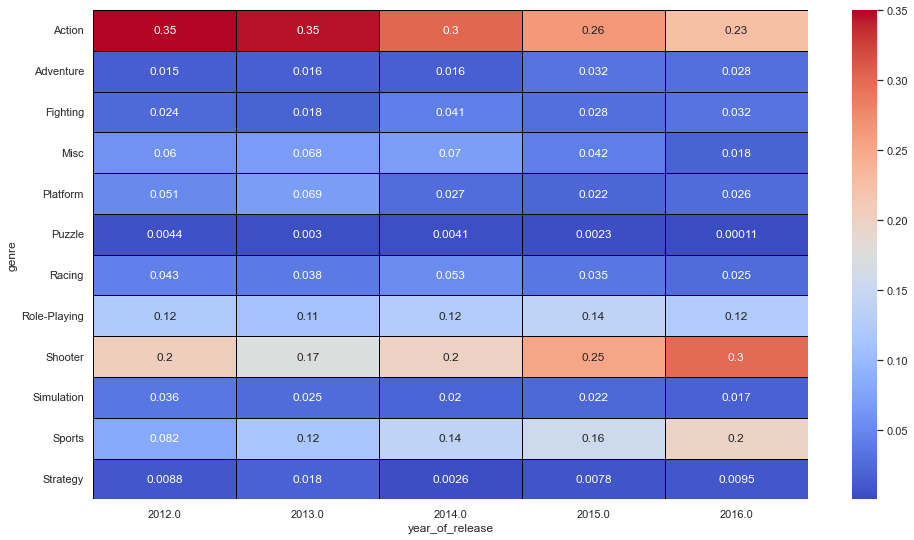

In [414]:
share_heatmap(relevant_data, 'genre', 'year_of_release', 'total_sales', 'sum', True)

#### **Промежуточный вывод**
Если посмотреть на популярность (рассчитанная как доля игр конкретного жанра в общих продажах за год) жанров во времени, то окажется, что несмотря на лидирующую позицию по продажам жанра `Action`  за последние 7 лет, наблюдается нисходящая тенденция к его популярности. В 2016 г. лидером рынка становятся игры в жанре `Shooter`. Если смотреть на популярность жанра во времени, то можно увидеть, что жанр `Misc` стал значительно мене популярным, чем раньше. Возможно, это связано с тем, что этот жанр в некотором смысле собирательный, а с развитием игровой индустрии появлялись более четкие критерии отнесение игры к определенному жанру, поэтому их доля значительно снизилась к 2016 г. По этой причине **не стоит включать в рекламную кампанию игры жанра `Misc`**, несмотря на общие продажи этого жанра.

**Наиболее приоритетными жанрами** следует считать: **`Action`**, **`Shooter`**, **`Sports`**, **`Role-Playing`**.

In [415]:
popular_genres = ['Action', 'Shooter', 'Sports', 'Role-Playing']

<AxesSubplot:xlabel='genre', ylabel='total_sales'>

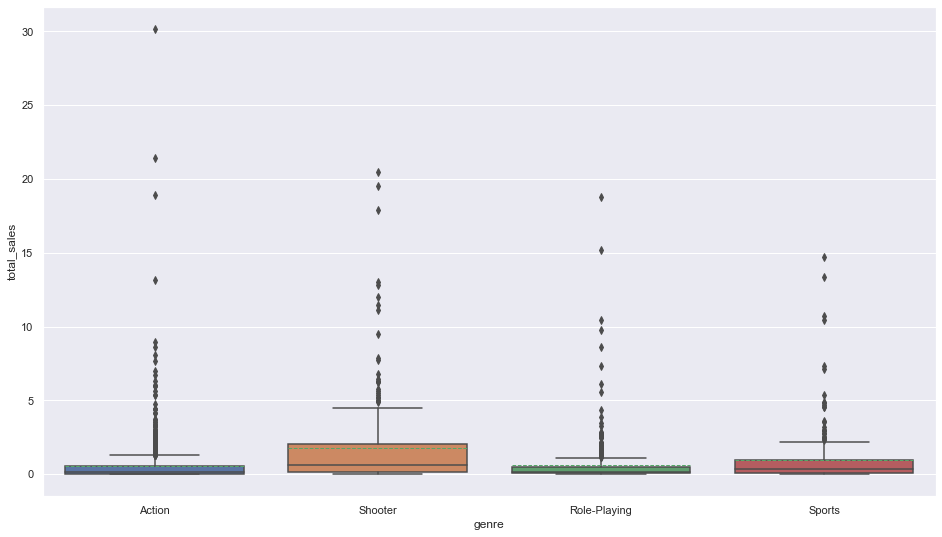

In [416]:
sns.boxplot(x='genre', 
            y='total_sales', 
            data=relevant_data[relevant_data['genre'].isin(popular_genres)], 
            showmeans = True, 
            meanline = True)
# plt.ylim(0, 2,5)

(0.0, 3.0)

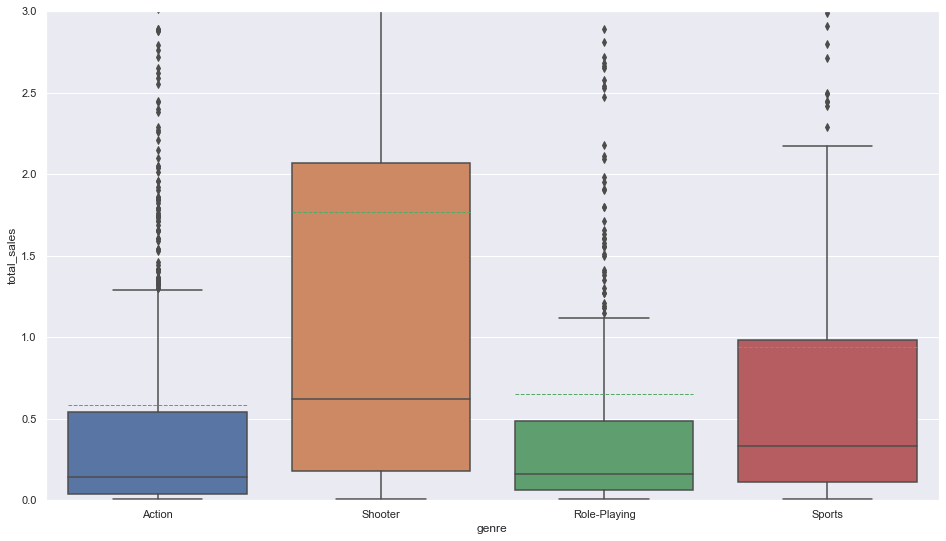

In [417]:
sns.boxplot(x='genre', 
            y='total_sales', 
            data=relevant_data[relevant_data['genre'].isin(popular_genres)], 
            showmeans = True, 
            meanline = True)
plt.ylim(0, 3)


</font><font color='Blue'><b>Видим, что у у игр жанра шутер и спорт медианные продажи выше. (примерно 600 тыс. копий и 350 тыс. копий соответственно), Выбираем эти жанры.</b></font><br>


### Далее ради интереса!!! Упражнение в прекрасном =)

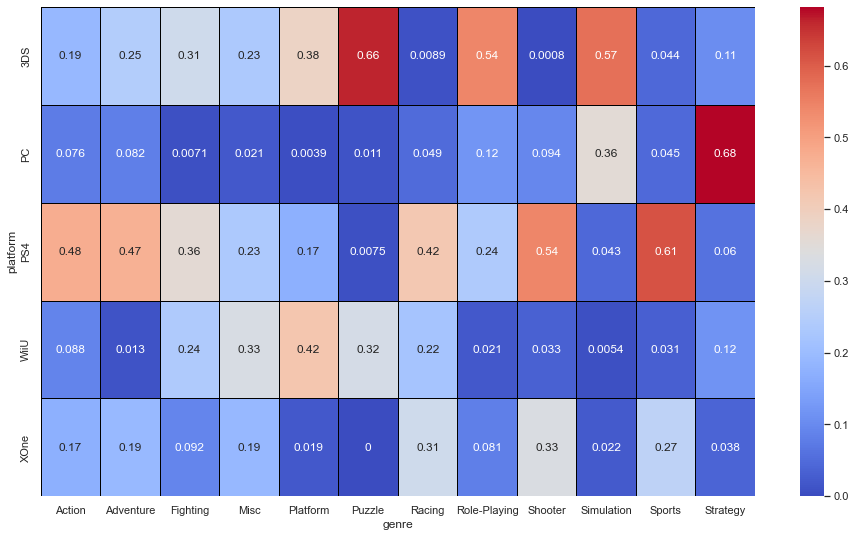

In [418]:
# Сегментация популярных платформ по жанрам за период 2010-2016 гг.
# Доля продаж игр в жанре по популярным платформам 
# (например, за период 2010-2016 гг. каждая вторая игра в жанре 'Action' и 'Shooter' выпускалась на плвтформе PS4)
share_heatmap(relevant_data[relevant_data['platform'].isin(popular_platforms)], 
               'platform', 'genre', 'total_sales', 'sum', True)

# Получается, что если мы хоитм продавать игры в жанре статегии, то стоит работать с платформой PC.

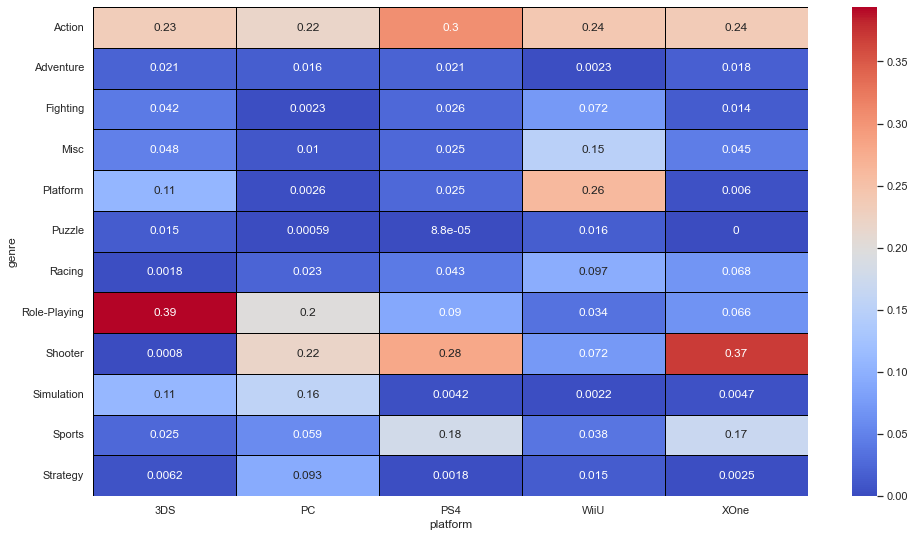

In [419]:
# Жанровая структура популярных платформ за период 2010-2016 гг.
# Доля продаж игр в жанре по популярным платформам 
# (например, за период 2010-2016 гг. каждая вторая игра в жанре 'Action' и 'Shooter' выпускалась на плвтформе PS4)
share_heatmap(relevant_data[relevant_data['platform'].isin(popular_platforms)], 
               'genre', 'platform',  'total_sales', 'sum', True)

## Шаг 4. Портрет пользователя каждого региона (NA, EU, JP)

### 4.1 Самые популярные платформы

In [420]:
# Вспомогательные данные (списки столбцов с продажами и краткие наименования регионов)
region_sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']
regions = []
for i in range(len(region_sales)):
    element = region_sales[i][0:region_sales[i].find('_')]
    regions.append(element)

In [421]:
def top_5_features_by_sales(data, feature_col, region_sale):
    d = (data
         .pivot_table(index=feature_col, 
                      values = region_sale, 
                      aggfunc = 'sum')
         .sort_values(region_sale, 
                      ascending=False))
    
    top_5 = d.head(5).index.tolist()
    
    row = pd.Series({region_sale : float(d[region_sale].tail(len(d)-5).sum())}, name='other_genre')
    d = d.head(5).append(row)
    
    return d

In [422]:
# Это я просто нашел. Пока не разобрался!
from IPython.display import display_html
def display_side_by_side(df_list):
    html_str=''
    for df in df_list:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [423]:
df_list = []
for i in region_sales:
    df_list.append(top_5_features_by_sales(relevant_data, 'platform', i))
    
display_side_by_side(df_list)

,na_sales
platform,
X360,140.57
PS4,108.74
PS3,103.74
XOne,93.12
3DS,55.49
other_genre,91.64
,eu_sales
platform,
PS4,141.09


**Визуализируем!!!**

In [424]:
def pie_chart(data, index, values, aggfunc):
    sns.set(rc={'figure.figsize':(5, 5)})
    (data
     .pivot_table(index=index, 
                  values=values, 
                  aggfunc=aggfunc)
     .sort_values(values, 
                  ascending=False)
     .head(5)
     .plot(kind='pie', 
           y=values, 
           autopct='%1.0f%%', 
           legend=False)
)   

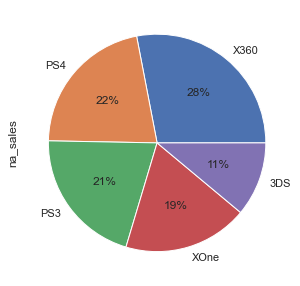

In [425]:
pie_chart(relevant_data, 'platform', 'na_sales', 'sum')

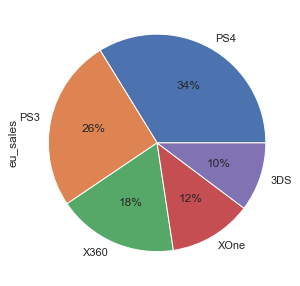

In [426]:
pie_chart(relevant_data, 'platform', 'eu_sales', 'sum')

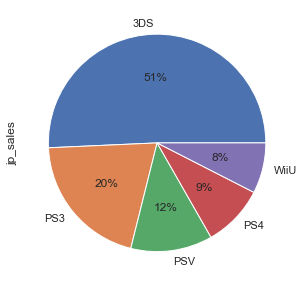

In [427]:
pie_chart(relevant_data, 'platform', 'jp_sales', 'sum')

Рассмотрим предпочтения за последний год

### Выводы по популярности платформ

**Общие выводы:**
* Предпочтения платформ отличаются по регионам.
* Предпочтения платформ в регионах неустойчивы во времени. Это связано с появнлением новых более совершенных платформ. В частности вытесняется платформа X360 платформой XOne.

**Выводы по регионам:**
* North America (NA):
_________________
**2010-2016 гг.**

'X360', 'PS3', 'Wii', 'PS4', 'XOne'  

'25.4%', '19.4%', '16.7%', '8.3%', '7.8%'

**2016 г.**

'PS4', 'XOne', '3DS', 'WiiU', 'PC'

'47.8%', '31.8%', '9.2%', '4.7%', '3.0%'
______________
* Europe (EU)

**2010-2016 гг.**

'PS3', 'X360', 'PS4', 'PC', 'Wii'

'25.4%', '19.4%', '16.7%', '8.3%', '7.8%'

**2016 г.**

'PS4', 'XOne', 'PC', '3DS', 'WiiU'

'62.0%', '18.8%', '6.9%', '4.5%', '2.9%'
______________
* Japan (JP)

**2010-2016 гг.**

'3DS', 'PS3', 'PSP', 'DS', 'PSV'

'32.9%', '19.4%', '13.9%', '9.1%', '7.1%'

**2016 г.**

'3DS', 'PS4', 'PSV', 'PS3', 'WiiU'

'41.6%', '29.7%', '18.4%', '6.7%', '3.5%'

### 4.2 Самые популярные жанры

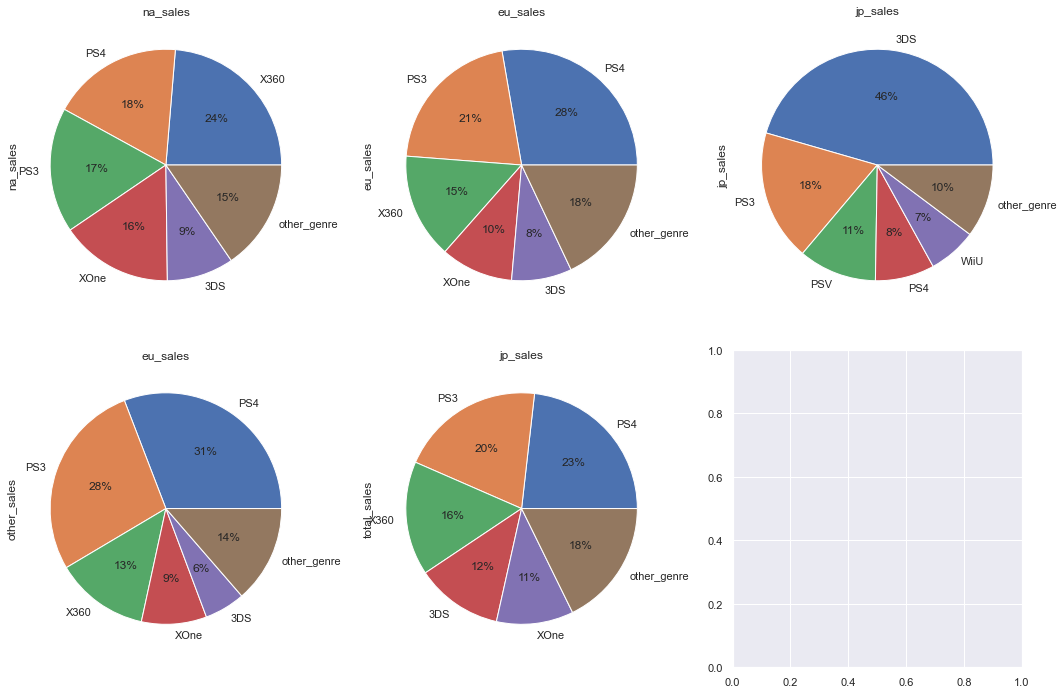

In [428]:
region_sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']
df_list = []

for i in region_sales:
    df_list.append(top_5_features_by_sales(relevant_data, 'platform', i))
    
rows = 2
count = 3
fig, ax = plt.subplots(rows, count)


for row in range(rows):
    for col in range(count):
        if row*count+col<len(region_sales):
            df_list[row*count+col].plot(ax=ax[row, col],figsize=(15, 10), 
                                        title=region_sales[row+col], 
                                        kind='pie', 
                                        y=region_sales[row*count+col], 
                                        autopct='%1.0f%%', 
                                        legend=False)



plt.tight_layout()
plt.show()

In [429]:
df_list = []
for i in region_sales:
    df_list.append(top_5_features_by_sales(relevant_data, 'genre', i))
    
display_side_by_side(df_list)

,na_sales
genre,
Action,180.15
Shooter,144.79
Sports,81.53
Role-Playing,64.00
Misc,38.19
other_genre,84.64
,eu_sales
genre,
Action,161.70


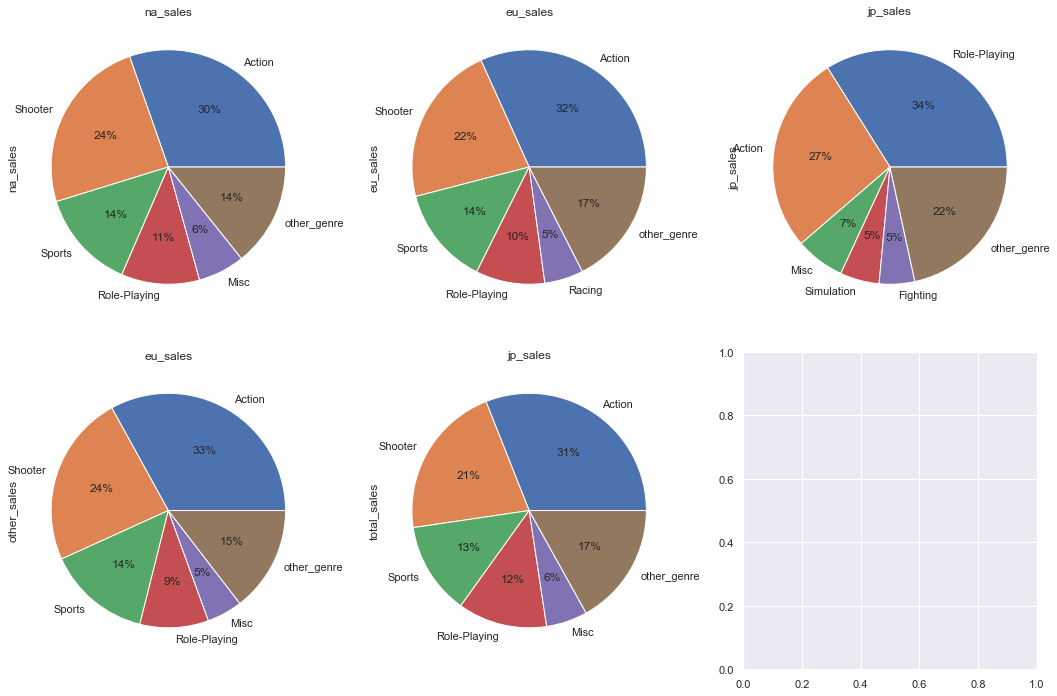

In [430]:
rows = 2
count = 3
fig, ax = plt.subplots(rows, count)


for row in range(rows):
    for col in range(count):
        if row*count+col<len(region_sales):
            df_list[row*count+col].plot(ax=ax[row, col],figsize=(15, 10), 
                                        title=region_sales[row+col], 
                                        kind='pie', 
                                        y=region_sales[row*count+col], 
                                        autopct='%1.0f%%', 
                                        legend=False)



plt.tight_layout()
plt.show()

* Особенно предпочтеия по жанрам отличаются у японцев. В отличие от североамериканцев и европейцев им нравится жанр `Role-Playing`. 
* Предпочтения по жанрам более устойчивы во времени чем, предпочтения по платформам.

Help on function heatmap in module __main__:

heatmap(data, index, columns, values, aggfunc, annot=False)



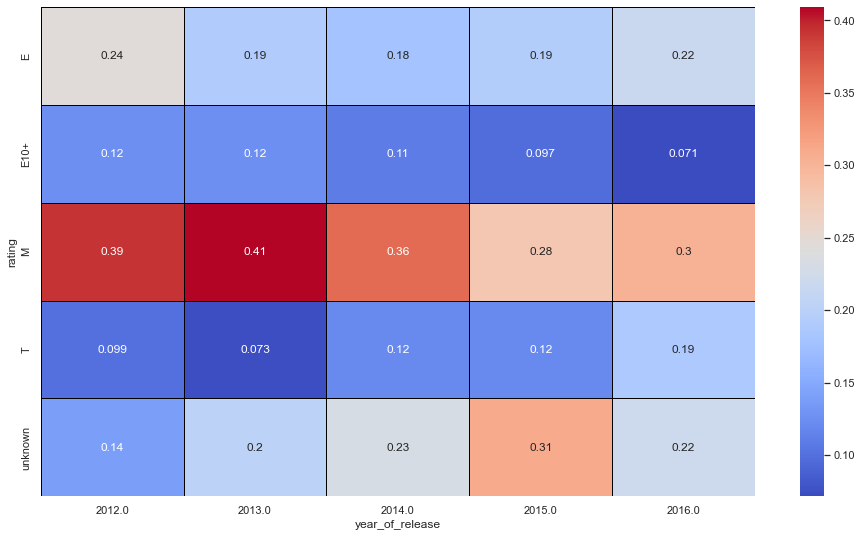

In [431]:
help(heatmap)
share_heatmap(relevant_data, 'rating', 'year_of_release', 'total_sales', 'sum', True)

* Возрастной рейтинг предназначен для маркироваки игры в Северной Америке, поэтому вполне вероятно, что в некоторых регионах будет много игр без этой маркировки
* Наибольшее количество продаж приходится на игры с возрастными рейтингами **`M`** («Для взрослых»: материалы игры не подходят для подростков младше 17 лет), **`T`** («Подросткам»: Игра подходит для лиц от 13 лет), **`E`** («Для всех»).
* Значительная доля пришлась на **неизвестный** рейтинг.

Text(0.5, 1.0, 'na_sales')

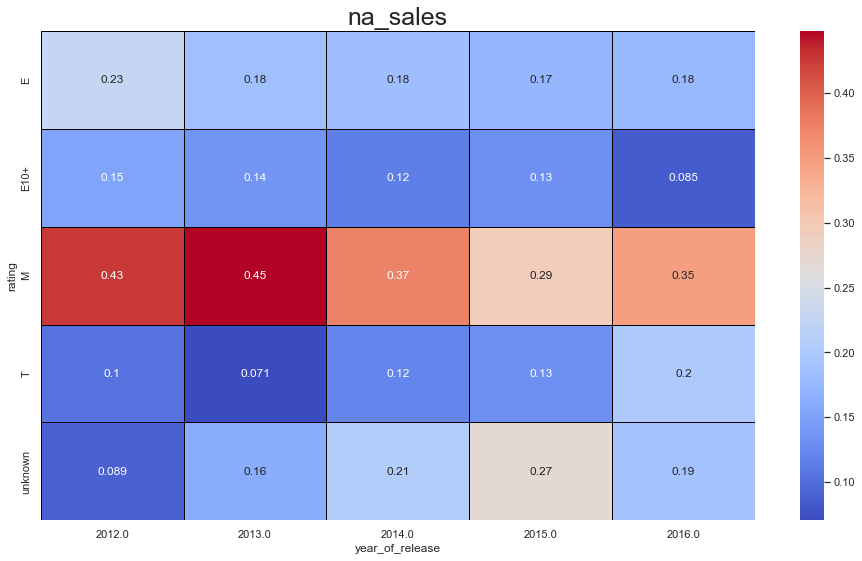

In [432]:
share_heatmap(relevant_data, 'rating', 'year_of_release', 'na_sales', 'sum', True)
plt.title('na_sales', fontsize=25)

* В Северной Америке продажи игр с рейтингом **`E` и `T`** вытесняют из лидеров игры с рейтингом **`E10+`**.
* Даже в Северной америке много игр без рейтинга.

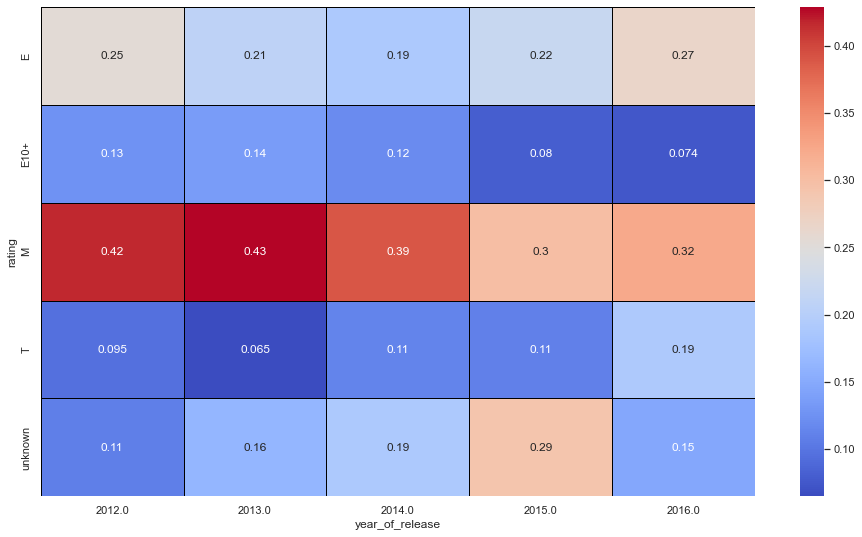

In [433]:
share_heatmap(relevant_data, 'rating', 'year_of_release', 'eu_sales', 'sum', True)

* В Европе продажи игр с рейтингом **`E`** занимают еще большую долю, чем в Северной Америке и даже не сильно отстают от игр с рейтингом **`M`**.
* Доля игр с неизвесным рейтингом на 2016 г. составила 16% в Европе.

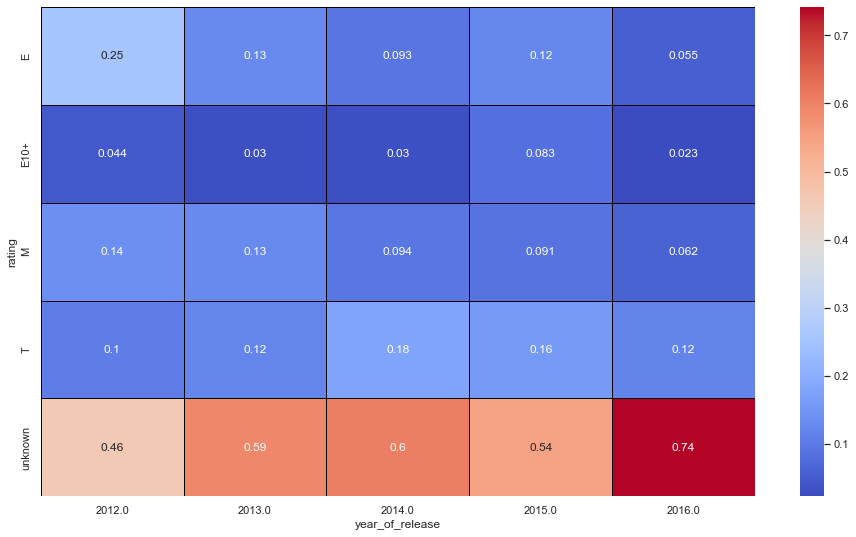

In [434]:
share_heatmap(relevant_data, 'rating', 'year_of_release', 'jp_sales', 'sum', True)

* В Японии основная доля рынка приходится на игры  **`БЕЗ РЕЙТИНГА`**. Потому что маркировка североамериканская.


(0.0, 4.0)

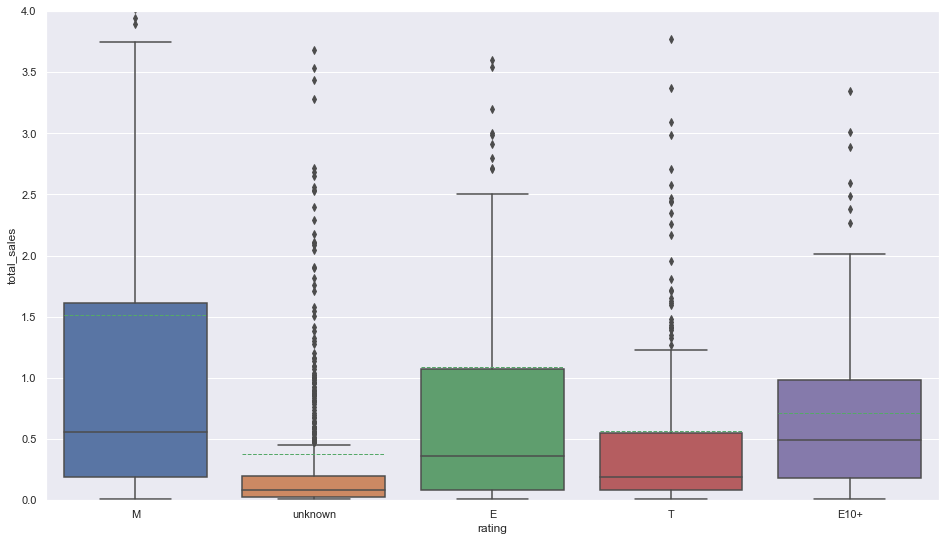

In [435]:
sns.set(rc={'figure.figsize':(16, 9)})
sns.boxplot(x='rating', 
            y='total_sales', 
            data=relevant_data[relevant_data['genre'].isin(popular_genres)], 
            showmeans = True, 
            meanline = True)

plt.ylim(0, 4)

(0.0, 1.5)

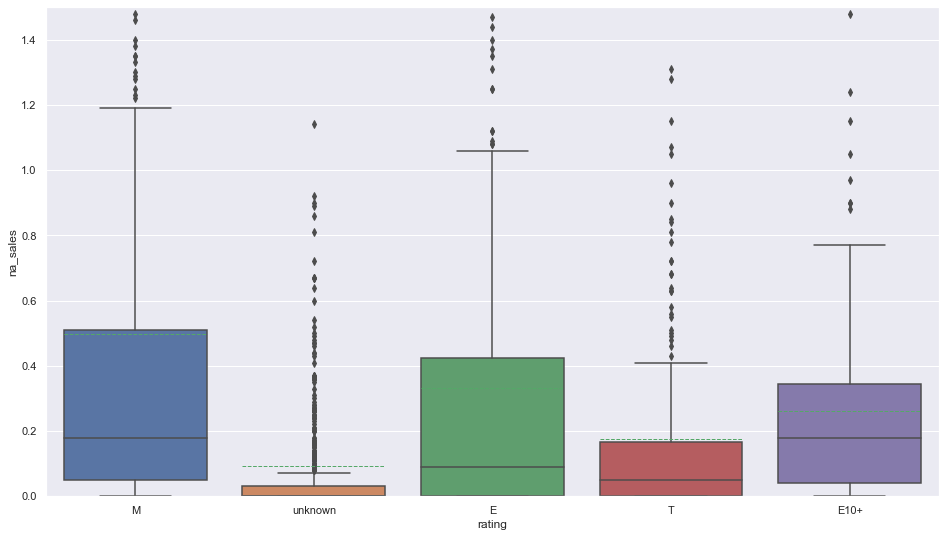

In [436]:
sns.set(rc={'figure.figsize':(16, 9)})
sns.boxplot(x='rating', 
            y='na_sales', 
            data=relevant_data[relevant_data['genre'].isin(popular_genres)], 
            showmeans = True, 
            meanline = True)

plt.ylim(0, 1.5)

(0.0, 1.0)

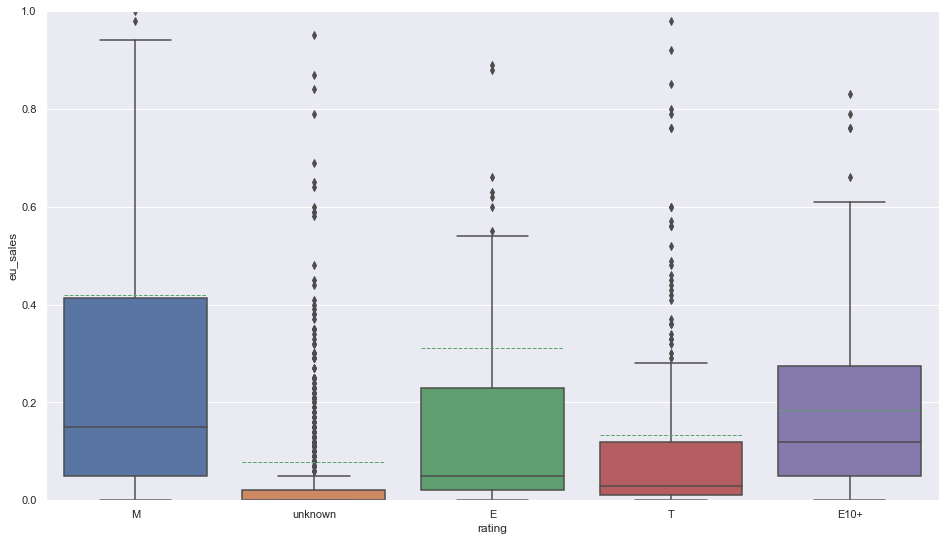

In [437]:
sns.set(rc={'figure.figsize':(16, 9)})
sns.boxplot(x='rating', 
            y='eu_sales', 
            data=relevant_data[relevant_data['genre'].isin(popular_genres)], 
            showmeans = True, 
            meanline = True)

plt.ylim(0, 1)

(0.0, 0.1)

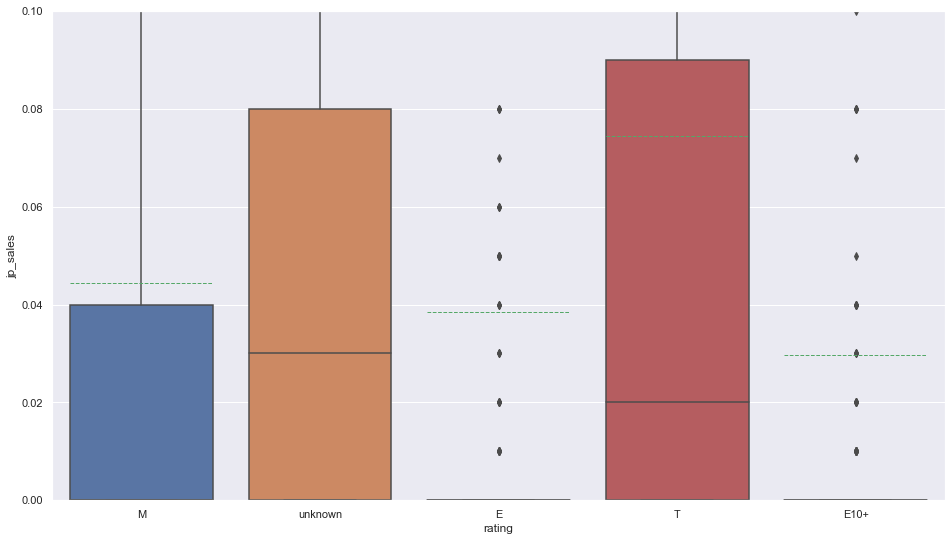

In [438]:
sns.set(rc={'figure.figsize':(16, 9)})
sns.boxplot(x='rating', 
            y='jp_sales', 
            data=relevant_data[relevant_data['genre'].isin(popular_genres)], 
            showmeans = True, 
            meanline = True)

plt.ylim(0, 0.1)

По медианным продажам, можно сказать, что есть зависимость от рейтинга. Причем это соотношение устойчиво к региону (Европа или Северная америка). Но в Японии подавляющее большинство игр не маркируется. Таким образом, можно сделать вывод, что в Европе и СА следует вкладываться в игры с рейтингом `М` (его доля на рынке высока и медианные продажи тоже). В Японии на рейтинг можно не ориентироваться. Относительно популярный рейтинг для игр `T`.

In [439]:
# Комментарий ревьюера
temp = relevant_data.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


unknown    1276
M           503
T           412
E           394
E10+        313
Name: rating, dtype: int64

## Шаг 5. Проверка гипотез
* Средние пользовательские рейтинги платформ `Xbox One` и `PC` **одинаковые**.
* Средние пользовательские рейтинги жанров `Action` (англ. «действие», экшен-игры) и `Sports` (англ. «спортивные соревнования») **разные**.

Для проверки первого утверждения сформулируем нулевую и альтернативную гипотезы:
* H0 - cредние пользовательские рейтинги платформ `Xbox One` и `PC` **равны**.
* H1 - cредние пользовательские рейтинги платформ `Xbox One` и `PC` **различаются**.

Для проверки второго утверждения сформулируем нулевую и альтернативную гипотезы:
* H0 - cредние пользовательские рейтинги жанров `Action` и `Sports`  **равны**.
* H1 - cредние пользовательские рейтинги жанров `Action` и `Sports` **различаются**.

Для проверки этих утверждений необходимо провести тест сравнения средних двух генеральных совокупнсотей. В первом случае две генеральные совокупнсоти - это оценки пользователей пользователи платформ `Xbox One` и `PC`. А во втором случае - пользовательские оценки игр жанров `Action`  и `Sports`.

In [440]:
xone_user_scores = relevant_data.loc[relevant_data['platform'] == 'XOne', 'user_score'].dropna()
pc_user_scores = relevant_data.loc[relevant_data['platform'] == 'PC', 'user_score'].dropna()

print(xone_user_scores.var())
print(pc_user_scores.var())

1.9069968429360702
2.7471582035657867


In [441]:
xone_user_scores = relevant_data.loc[relevant_data['platform'] == 'XOne', 'user_score'].dropna()
pc_user_scores = relevant_data.loc[relevant_data['platform'] == 'PC', 'user_score'].dropna()

alpha = .05

results = st.ttest_ind(xone_user_scores, pc_user_scores, equal_var = False)

print('Средняя оценка пользователей для игр на платформе "XOne":', round(xone_user_scores.mean(), 2))
print('Средняя оценка пользователей для игр на платформе "PC":', round(pc_user_scores.mean(), 2))
print()
print('p-значение: ', results.pvalue)
print()

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу.')
    print('H1 - cредние пользовательские рейтинги платформ `Xbox One` и `PC` различаются.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')
    print('H0 - cредние пользовательские рейтинги платформ `Xbox One` и `PC` равны.')

Средняя оценка пользователей для игр на платформе "XOne": 6.52
Средняя оценка пользователей для игр на платформе "PC": 6.45

p-значение:  0.6206366351489678

Не получилось отвергнуть нулевую гипотезу.
H0 - cредние пользовательские рейтинги платформ `Xbox One` и `PC` равны.


In [442]:
action_user_scores = relevant_data.loc[relevant_data['genre'] == 'Action', 'user_score'].dropna()
sports_user_scores = relevant_data.loc[relevant_data['genre'] == 'Sports', 'user_score'].dropna()



alpha = .05

results = st.ttest_ind(action_user_scores, sports_user_scores, equal_var = False)

print('Средняя оценка пользователей для игр в жанре "Action":', round(action_user_scores.mean(), 2))
print('Средняя оценка пользователей для игр в жанре "Sports":', round(sports_user_scores.mean(), 2))
print()
print('p-значение: ', results.pvalue)
print()

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу.')
    print('H1 - cредние пользовательские рейтинги жанров `Action` и `Sports` различаются.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')
    print('H0 - cредние пользовательские рейтинги жанров `Action` и `Sports` равны.')

Средняя оценка пользователей для игр в жанре "Action": 6.83
Средняя оценка пользователей для игр в жанре "Sports": 5.46

p-значение:  3.3183730691020334e-20

Отвергаем нулевую гипотезу.
H1 - cредние пользовательские рейтинги жанров `Action` и `Sports` различаются.


# ВЫВОДЫ

### Шаг 1. Выгрузка данных и общая информация

Выявлены следующие облемы в данных:
* Некорректное название столбца (общая для всех столбцов).
* Возможное наличие неявных дубликатов (в столбцах с текстовыми данными).
* Неверны тип данных (для столбцов год выпуска и оценка пользователей).
* Наличие пропусков.
_____

### Шаг 2. Подготовка данных к анализу

* Преобразованы названия столбцов (приведены к нижнему регистру).

* Произведен поиск и очистка данных от явных и неявных дубликатов в текстовых стоблбцах.

* Изменены типы данных в столбцах в соответствии с их интерпретацией
* Удалены пропуски, где это было целесообразно.

* Рассчитаны совокупные продажи по всем регионам (столбец `total_sales`).
____

### Шаг 3. Исследовательский анализ данных

* Цикл жизни платформы составляем=т примерно 8-12 лет. Соответственно, нужно ориентироваться на платформы, продажи которых в 2017 г. предположительно должны выходить на пик в наилучшем случае или, по крайней мере, активная фаза жизни этих платформ должна включать 2017 г.

* **Самые популярные платформы на момент 2017 г.** вероятнее всего будут **`PS4`**, **`XOne`**, **`DS`**, **`PC`**, **`WiiU`**.

* Для каждой популярной платформы характерно наличие игр-бестселлеров, которые продаются огромными количествами копий и смещают среднее значение проданных копий по выборке.

* Доля выбросов по популярным платформам составляет от 8,8% до 13,8%. Причем все выбросы находятся справа.

* В нашем исследовании выбросы представяют особый интерес. Чем больше игр-бестселлеров у платформы, тем она более привлекательна для нас.

* По объемам продаж в 2016 г. с отрывом лидируют платформы `PS4` (явный лидер) и `XOne`. Возможно, именно для этих платформ выпускаются эксклюзивные игры с высокими продажами.

* Не выявлено явной связи между оценками и объемами продаж. Причем этот результат устойчив к разбивке выборки на наблюдения без выбросов или к выборке, состоящей исключительно из выбросов (игры-бестселелры).
___

### Шаг 4. Портрет пользователя каждого региона (NA, EU, JP)

* Предпочтения платформ отличаются по регионам.

* Предпочтения платформ в регионах неустойчивы во времени. Это связано с появнлением новых более совершенных платформ. В частности вытесняется платформа X360 платформой XOne.

## Приоритеты рекламной кампании для компании "Стримчик"


* **САМЫЕ ПОПУЛЯРНЫЕ ПЛАТФОРМЫ**
    - Для каждого региона кроме Японии: **`PS4`**, **`XOne`** (расставлены по приоритетности).
    - Для Японии: , **`3DS`**, **`PS4`** (расставлены по приоритетности).
    

* **САМЫЕ ПОПУЛЯРНЫЕ ЖАНРЫ** 
    - Для каждого региона кроме Японии: **`Shooter`**, **`Sports`** (расставлены по приоритетности).
    - Для Японии: , **`Action`**, **`Role-Playing`**, **`Adventure`**. (расставлены по приоритетности).
    
    
    
* **Возратсные огорничения не будут являться кулечевой характеристикой для определения приоритетов рекламной кампании, поскольку довольно много пропусков**

* **САМЫЕ ПОПУЛЯРНЫЕ ВОЗРАСТНЫЕ ОГРАНИЧЕНИЯ** (в порядке приоритетности)
    - **`M`**: **«Для взрослых»**: (материалы игры не подходят для подростков младше 17 лет) (для Европы и СА);
    - **`T`**: **«Подросткам»** (игра подходит для лиц от 13 лет) (для Японии); 
    - **`БЕЗ РЕЙТИНГА`** (для Японии);
    
    

    
    
* **ОБЩЕЕ ПРЕДПОЛОЖЕНИЕ**

Выбор приотритетных направлений для рекламной кампании зависит от желаемого результата, первоначально поставленных целей и исходных предпосылок. В частности, если наша компания борется за рынок, то следует вкладывать деньги в рекламные кампании потенциально наиболее популярных продуктов, чтобы отвоевать наибольшую часть наиболее прибыльного сегмента. А если же цель компании реализовать имеющиеся игры, то скорее всего будут проблемы с продажами непопулярных жанров или рейтингов. В этом случае, стот сконцентрировать ресурсы на продвижении самых популярных жанров. Возможно также ситуации когда мы хотим выбрать на рынке точку роста. В этом случае следует обратить внимание на не очень популярные жанры с высокой концентрацией продаж по платформе (например, стратегии на `PC`). Наш анализ выявил наиболее перспективные платформы и жанры с точки зрения продаж, дажее нжно формулировать цели рекламной кампании и выбирать для неё стратегию.

### Шаг 5. Проверка гипотез

* Средние пользовательские рейтинги платформ `Xbox One` и `PC` можно считать равными.
* Средние пользовательские рейтинги жанров `Action`  и `Sports` различаются.


    